# Active Learning With Twitter Classifier & Data Set
### For research paper: Active Learning To Reduce Human Labeling For Automatic Psychological TextClassification
### Author: Jahson O'Dwyer Wha Binda

# Import Data Set

In [29]:
 import pandas as pd
import numpy as np

import csv

with open('training.1600000.processed.noemoticon.csv') as data:
    reader = csv.DictReader(data, fieldnames=["sentiment", "2", "3", "4", "5", "tweet"])

# Data
    tweets = {"tweet" : [], "sentiment" : []}
    
    i = 0
    print("Reading..")
    start = pd.Timestamp.now()
#  Load DATA/Labels
    for row in reader:
        if i > 100000:
            break
        tweets["tweet"].append(row['tweet'])
        tweets["sentiment"].append(row['sentiment'] == '4')
    
    print("Done reading")
    print(pd.Timestamp.now() - start)
    print(len(tweets["tweet"]))

Reading..
Done reading
0 days 00:00:14.999545
1600000


# PreProccessing

In [30]:
import sys

sys.version

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"wasn't", 'your', 'will', 'himself', 'if', 'being', 'did', "hasn't", 'myself', 'are', 'it', 'you', 'here', 'don', 'now', 'can', 'my', 'them', 'over', 'm', "couldn't", 'aren', 'doing', 'our', 'hers', 'hadn', 'where', 'to', 'through', 'again', "wouldn't", 'this', "needn't", 't', 'yours', 'itself', 'with', 'shan', 'o', 'a', 'off', 'so', 've', 'nor', 'below', "won't", 'we', 'ma', "that'll", "weren't", 'themselves', 'hasn', 'until', 'only', 'me', 'own', 'wouldn', 'mustn', 'been', 'up', 'into', 'doesn', "doesn't", 'such', 'more', 'when', "aren't", 'these', 'most', 'while', 'or', 'in', "mustn't", 'was', 'weren', "isn't", 'their', 'herself', 'its', 'he', 'should', 'is', 'about', 'once', 's', 'on', 'do', 'out', 'some', 'before', 'and', 'but', 'above', 'for', 'very', 'that', 'further', "you're", 'they', 'd', 'both', "should've", 'his', 'all', 'because', 'won', "you've", 'has', 'no', "didn't", 'mightn', 'any', "shouldn't", 'ours', "she's", 'yourselves', 'whom', 'between', 'theirs', 'not', 'other

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [32]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [33]:
nltk.download('punkt')
nltk.download('wordnet')

def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 


pTweets = [];

for x in tweets['tweet']:
    pTweets.append(process_tweets(x))


for i in range(len(pTweets)):
    pTweets[i] = convert_abbrev_in_text(pTweets[i])
print('Text Preprocessing complete.')
tweets['processed_tweets'] = pTweets
# tweets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jahso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jahso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing complete.


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['processed_tweets'])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
randomSeed = 19

X=text_counts
y=tweets['sentiment']

X, y = shuffle(X, y, random_state=47)

initX = X[:10]
initY = y[:10]
X = X[10:]
y = y[10:]
print(initY)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=randomSeed)

[True, True, False, True, True, False, True, True, False, True]


In [37]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

#LinearSVC Used due to time constraints LinearSVC is faster than standard SVC.
svm = LinearSVC(random_state=randomSeed)
svm = CalibratedClassifierCV(svm)

# Active Learning

In [40]:
from sklearn.metrics import accuracy_score

from modAL.models import ActiveLearner
from modAL.multilabel import SVM_binary_minimum
from modAL.multilabel import min_confidence
from modAL.uncertainty import uncertainty_sampling

# Uncertainty Sampling query strategy used to pick based on uncertainety similar to min condifidence
# min_confidence cannot be used as this is not a multi-label problem, 

learner = ActiveLearner(
    estimator=svm,
    query_strategy=uncertainty_sampling,
    X_training=initX, y_training=initY
)

pred = learner.predict(X_test)
unqueried_score = accuracy_score(y_true=y_test, y_pred=pred)
print("{:.2%}".format(unqueried_score))

51.87%


# Active Learning Loop

In [41]:
import scipy
def delete_row_csr(mat, i):
    if not isinstance(mat, scipy.sparse.csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    n = mat.indptr[i+1] - mat.indptr[i]
    if n > 0:
        mat.data[mat.indptr[i]:-n] = mat.data[mat.indptr[i+1]:]
        mat.data = mat.data[:-n]
        mat.indices[mat.indptr[i]:-n] = mat.indices[mat.indptr[i+1]:]
        mat.indices = mat.indices[:-n]
    mat.indptr[i:-1] = mat.indptr[i+1:]
    mat.indptr[i:] -= n
    mat.indptr = mat.indptr[:-1]
    mat._shape = (mat._shape[0]-1, mat._shape[1])

In [42]:
from sklearn.utils import check_consistent_length

N_QUERIES = 1000
performance_history = [unqueried_score]

lastAcc = unqueried_score
lastPred = []
count = 0

print(len(y_train))

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy.
start = pd.Timestamp.now()
while lastAcc < 0.73 and count < 1279990:
    query_index, query_instance = learner.query(X_train)
    
    query_index = query_index[0]
    
    # Teach our ActiveLearner model the record it has requested.
    X, y = X_train[query_index], y_train[query_index]
    learner.teach(X=X, y=[y])
    
    # Remove the queried instance from the unlabeled pool.

    y_train = np.delete(y_train, query_index)
    delete_row_csr(X_train, query_index)
    
    # Calculate and report our model's accuracy.
    qPred = learner.predict(X_test)
    model_accuracy = accuracy_score(y_true=y_test, y_pred=qPred)
    lastAcc = model_accuracy
    lastPred = qPred

    print('Accuracy for Query: ' + str(count) + ': {acc:0.4f}'.format(acc=model_accuracy))
    
    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)
    count+= 1

print(pd.Timestamp.now() - start)

1279992
Accuracy for Query: 0: 0.5192
Accuracy for Query: 1: 0.4836
Accuracy for Query: 2: 0.5180
Accuracy for Query: 3: 0.4939
Accuracy for Query: 4: 0.5065
Accuracy for Query: 5: 0.5076
Accuracy for Query: 6: 0.5070
Accuracy for Query: 7: 0.4952
Accuracy for Query: 8: 0.5133
Accuracy for Query: 9: 0.5062
Accuracy for Query: 10: 0.5245
Accuracy for Query: 11: 0.5194
Accuracy for Query: 12: 0.5217
Accuracy for Query: 13: 0.4992
Accuracy for Query: 14: 0.5316
Accuracy for Query: 15: 0.5256
Accuracy for Query: 16: 0.5008
Accuracy for Query: 17: 0.5134
Accuracy for Query: 18: 0.5146
Accuracy for Query: 19: 0.5095
Accuracy for Query: 20: 0.5150
Accuracy for Query: 21: 0.5137
Accuracy for Query: 22: 0.5116
Accuracy for Query: 23: 0.5157
Accuracy for Query: 24: 0.5216
Accuracy for Query: 25: 0.5122
Accuracy for Query: 26: 0.5261
Accuracy for Query: 27: 0.5153
Accuracy for Query: 28: 0.5111
Accuracy for Query: 29: 0.5167
Accuracy for Query: 30: 0.5242
Accuracy for Query: 31: 0.5293
Accuracy f

Accuracy for Query: 260: 0.5935
Accuracy for Query: 261: 0.5982
Accuracy for Query: 262: 0.5975
Accuracy for Query: 263: 0.5992
Accuracy for Query: 264: 0.5999
Accuracy for Query: 265: 0.6007
Accuracy for Query: 266: 0.6014
Accuracy for Query: 267: 0.6011
Accuracy for Query: 268: 0.6007
Accuracy for Query: 269: 0.5971
Accuracy for Query: 270: 0.5985
Accuracy for Query: 271: 0.5979
Accuracy for Query: 272: 0.5999
Accuracy for Query: 273: 0.6018
Accuracy for Query: 274: 0.6023
Accuracy for Query: 275: 0.6034
Accuracy for Query: 276: 0.6026
Accuracy for Query: 277: 0.6030
Accuracy for Query: 278: 0.5996
Accuracy for Query: 279: 0.5989
Accuracy for Query: 280: 0.6000
Accuracy for Query: 281: 0.6010
Accuracy for Query: 282: 0.6028
Accuracy for Query: 283: 0.6027
Accuracy for Query: 284: 0.6028
Accuracy for Query: 285: 0.6028
Accuracy for Query: 286: 0.6032
Accuracy for Query: 287: 0.6040
Accuracy for Query: 288: 0.6044
Accuracy for Query: 289: 0.6036
Accuracy for Query: 290: 0.6025
Accuracy

Accuracy for Query: 517: 0.6230
Accuracy for Query: 518: 0.6237
Accuracy for Query: 519: 0.6240
Accuracy for Query: 520: 0.6242
Accuracy for Query: 521: 0.6243
Accuracy for Query: 522: 0.6235
Accuracy for Query: 523: 0.6242
Accuracy for Query: 524: 0.6231
Accuracy for Query: 525: 0.6245
Accuracy for Query: 526: 0.6244
Accuracy for Query: 527: 0.6241
Accuracy for Query: 528: 0.6234
Accuracy for Query: 529: 0.6229
Accuracy for Query: 530: 0.6225
Accuracy for Query: 531: 0.6250
Accuracy for Query: 532: 0.6250
Accuracy for Query: 533: 0.6254
Accuracy for Query: 534: 0.6263
Accuracy for Query: 535: 0.6261
Accuracy for Query: 536: 0.6272
Accuracy for Query: 537: 0.6265
Accuracy for Query: 538: 0.6257
Accuracy for Query: 539: 0.6253
Accuracy for Query: 540: 0.6265
Accuracy for Query: 541: 0.6280
Accuracy for Query: 542: 0.6282
Accuracy for Query: 543: 0.6283
Accuracy for Query: 544: 0.6286
Accuracy for Query: 545: 0.6274
Accuracy for Query: 546: 0.6280
Accuracy for Query: 547: 0.6285
Accuracy

Accuracy for Query: 774: 0.6373
Accuracy for Query: 775: 0.6374
Accuracy for Query: 776: 0.6373
Accuracy for Query: 777: 0.6373
Accuracy for Query: 778: 0.6374
Accuracy for Query: 779: 0.6381
Accuracy for Query: 780: 0.6382
Accuracy for Query: 781: 0.6386
Accuracy for Query: 782: 0.6389
Accuracy for Query: 783: 0.6389
Accuracy for Query: 784: 0.6389
Accuracy for Query: 785: 0.6387
Accuracy for Query: 786: 0.6386
Accuracy for Query: 787: 0.6378
Accuracy for Query: 788: 0.6377
Accuracy for Query: 789: 0.6378
Accuracy for Query: 790: 0.6380
Accuracy for Query: 791: 0.6380
Accuracy for Query: 792: 0.6377
Accuracy for Query: 793: 0.6380
Accuracy for Query: 794: 0.6377
Accuracy for Query: 795: 0.6378
Accuracy for Query: 796: 0.6377
Accuracy for Query: 797: 0.6377
Accuracy for Query: 798: 0.6375
Accuracy for Query: 799: 0.6380
Accuracy for Query: 800: 0.6379
Accuracy for Query: 801: 0.6378
Accuracy for Query: 802: 0.6378
Accuracy for Query: 803: 0.6382
Accuracy for Query: 804: 0.6380
Accuracy

Accuracy for Query: 1030: 0.6489
Accuracy for Query: 1031: 0.6488
Accuracy for Query: 1032: 0.6487
Accuracy for Query: 1033: 0.6498
Accuracy for Query: 1034: 0.6500
Accuracy for Query: 1035: 0.6507
Accuracy for Query: 1036: 0.6504
Accuracy for Query: 1037: 0.6508
Accuracy for Query: 1038: 0.6509
Accuracy for Query: 1039: 0.6503
Accuracy for Query: 1040: 0.6502
Accuracy for Query: 1041: 0.6499
Accuracy for Query: 1042: 0.6503
Accuracy for Query: 1043: 0.6511
Accuracy for Query: 1044: 0.6513
Accuracy for Query: 1045: 0.6513
Accuracy for Query: 1046: 0.6513
Accuracy for Query: 1047: 0.6504
Accuracy for Query: 1048: 0.6505
Accuracy for Query: 1049: 0.6503
Accuracy for Query: 1050: 0.6504
Accuracy for Query: 1051: 0.6507
Accuracy for Query: 1052: 0.6506
Accuracy for Query: 1053: 0.6507
Accuracy for Query: 1054: 0.6503
Accuracy for Query: 1055: 0.6501
Accuracy for Query: 1056: 0.6501
Accuracy for Query: 1057: 0.6503
Accuracy for Query: 1058: 0.6505
Accuracy for Query: 1059: 0.6509
Accuracy f

Accuracy for Query: 1279: 0.6557
Accuracy for Query: 1280: 0.6552
Accuracy for Query: 1281: 0.6557
Accuracy for Query: 1282: 0.6556
Accuracy for Query: 1283: 0.6552
Accuracy for Query: 1284: 0.6548
Accuracy for Query: 1285: 0.6547
Accuracy for Query: 1286: 0.6543
Accuracy for Query: 1287: 0.6546
Accuracy for Query: 1288: 0.6550
Accuracy for Query: 1289: 0.6559
Accuracy for Query: 1290: 0.6558
Accuracy for Query: 1291: 0.6552
Accuracy for Query: 1292: 0.6553
Accuracy for Query: 1293: 0.6553
Accuracy for Query: 1294: 0.6552
Accuracy for Query: 1295: 0.6557
Accuracy for Query: 1296: 0.6557
Accuracy for Query: 1297: 0.6557
Accuracy for Query: 1298: 0.6556
Accuracy for Query: 1299: 0.6556
Accuracy for Query: 1300: 0.6558
Accuracy for Query: 1301: 0.6560
Accuracy for Query: 1302: 0.6565
Accuracy for Query: 1303: 0.6569
Accuracy for Query: 1304: 0.6567
Accuracy for Query: 1305: 0.6563
Accuracy for Query: 1306: 0.6567
Accuracy for Query: 1307: 0.6568
Accuracy for Query: 1308: 0.6568
Accuracy f

Accuracy for Query: 1528: 0.6616
Accuracy for Query: 1529: 0.6620
Accuracy for Query: 1530: 0.6621
Accuracy for Query: 1531: 0.6620
Accuracy for Query: 1532: 0.6619
Accuracy for Query: 1533: 0.6623
Accuracy for Query: 1534: 0.6622
Accuracy for Query: 1535: 0.6619
Accuracy for Query: 1536: 0.6617
Accuracy for Query: 1537: 0.6618
Accuracy for Query: 1538: 0.6617
Accuracy for Query: 1539: 0.6616
Accuracy for Query: 1540: 0.6620
Accuracy for Query: 1541: 0.6622
Accuracy for Query: 1542: 0.6623
Accuracy for Query: 1543: 0.6621
Accuracy for Query: 1544: 0.6622
Accuracy for Query: 1545: 0.6618
Accuracy for Query: 1546: 0.6616
Accuracy for Query: 1547: 0.6622
Accuracy for Query: 1548: 0.6621
Accuracy for Query: 1549: 0.6624
Accuracy for Query: 1550: 0.6625
Accuracy for Query: 1551: 0.6621
Accuracy for Query: 1552: 0.6623
Accuracy for Query: 1553: 0.6623
Accuracy for Query: 1554: 0.6623
Accuracy for Query: 1555: 0.6625
Accuracy for Query: 1556: 0.6628
Accuracy for Query: 1557: 0.6627
Accuracy f

Accuracy for Query: 1777: 0.6671
Accuracy for Query: 1778: 0.6672
Accuracy for Query: 1779: 0.6673
Accuracy for Query: 1780: 0.6673
Accuracy for Query: 1781: 0.6670
Accuracy for Query: 1782: 0.6674
Accuracy for Query: 1783: 0.6675
Accuracy for Query: 1784: 0.6676
Accuracy for Query: 1785: 0.6676
Accuracy for Query: 1786: 0.6678
Accuracy for Query: 1787: 0.6676
Accuracy for Query: 1788: 0.6676
Accuracy for Query: 1789: 0.6676
Accuracy for Query: 1790: 0.6676
Accuracy for Query: 1791: 0.6676
Accuracy for Query: 1792: 0.6678
Accuracy for Query: 1793: 0.6675
Accuracy for Query: 1794: 0.6677
Accuracy for Query: 1795: 0.6678
Accuracy for Query: 1796: 0.6679
Accuracy for Query: 1797: 0.6680
Accuracy for Query: 1798: 0.6687
Accuracy for Query: 1799: 0.6688
Accuracy for Query: 1800: 0.6689
Accuracy for Query: 1801: 0.6688
Accuracy for Query: 1802: 0.6688
Accuracy for Query: 1803: 0.6687
Accuracy for Query: 1804: 0.6686
Accuracy for Query: 1805: 0.6685
Accuracy for Query: 1806: 0.6685
Accuracy f

Accuracy for Query: 2026: 0.6696
Accuracy for Query: 2027: 0.6696
Accuracy for Query: 2028: 0.6689
Accuracy for Query: 2029: 0.6691
Accuracy for Query: 2030: 0.6688
Accuracy for Query: 2031: 0.6690
Accuracy for Query: 2032: 0.6690
Accuracy for Query: 2033: 0.6689
Accuracy for Query: 2034: 0.6685
Accuracy for Query: 2035: 0.6680
Accuracy for Query: 2036: 0.6682
Accuracy for Query: 2037: 0.6681
Accuracy for Query: 2038: 0.6682
Accuracy for Query: 2039: 0.6683
Accuracy for Query: 2040: 0.6683
Accuracy for Query: 2041: 0.6687
Accuracy for Query: 2042: 0.6690
Accuracy for Query: 2043: 0.6692
Accuracy for Query: 2044: 0.6696
Accuracy for Query: 2045: 0.6697
Accuracy for Query: 2046: 0.6698
Accuracy for Query: 2047: 0.6698
Accuracy for Query: 2048: 0.6696
Accuracy for Query: 2049: 0.6696
Accuracy for Query: 2050: 0.6699
Accuracy for Query: 2051: 0.6696
Accuracy for Query: 2052: 0.6695
Accuracy for Query: 2053: 0.6695
Accuracy for Query: 2054: 0.6695
Accuracy for Query: 2055: 0.6697
Accuracy f

Accuracy for Query: 2275: 0.6747
Accuracy for Query: 2276: 0.6747
Accuracy for Query: 2277: 0.6747
Accuracy for Query: 2278: 0.6748
Accuracy for Query: 2279: 0.6748
Accuracy for Query: 2280: 0.6749
Accuracy for Query: 2281: 0.6748
Accuracy for Query: 2282: 0.6749
Accuracy for Query: 2283: 0.6749
Accuracy for Query: 2284: 0.6751
Accuracy for Query: 2285: 0.6751
Accuracy for Query: 2286: 0.6751
Accuracy for Query: 2287: 0.6752
Accuracy for Query: 2288: 0.6754
Accuracy for Query: 2289: 0.6756
Accuracy for Query: 2290: 0.6756
Accuracy for Query: 2291: 0.6754
Accuracy for Query: 2292: 0.6753
Accuracy for Query: 2293: 0.6753
Accuracy for Query: 2294: 0.6756
Accuracy for Query: 2295: 0.6755
Accuracy for Query: 2296: 0.6757
Accuracy for Query: 2297: 0.6755
Accuracy for Query: 2298: 0.6754
Accuracy for Query: 2299: 0.6755
Accuracy for Query: 2300: 0.6756
Accuracy for Query: 2301: 0.6754
Accuracy for Query: 2302: 0.6754
Accuracy for Query: 2303: 0.6753
Accuracy for Query: 2304: 0.6753
Accuracy f

Accuracy for Query: 2524: 0.6748
Accuracy for Query: 2525: 0.6772
Accuracy for Query: 2526: 0.6746
Accuracy for Query: 2527: 0.6745
Accuracy for Query: 2528: 0.6744
Accuracy for Query: 2529: 0.6744
Accuracy for Query: 2530: 0.6742
Accuracy for Query: 2531: 0.6742
Accuracy for Query: 2532: 0.6744
Accuracy for Query: 2533: 0.6743
Accuracy for Query: 2534: 0.6741
Accuracy for Query: 2535: 0.6743
Accuracy for Query: 2536: 0.6741
Accuracy for Query: 2537: 0.6741
Accuracy for Query: 2538: 0.6740
Accuracy for Query: 2539: 0.6741
Accuracy for Query: 2540: 0.6743
Accuracy for Query: 2541: 0.6744
Accuracy for Query: 2542: 0.6744
Accuracy for Query: 2543: 0.6742
Accuracy for Query: 2544: 0.6747
Accuracy for Query: 2545: 0.6772
Accuracy for Query: 2546: 0.6773
Accuracy for Query: 2547: 0.6774
Accuracy for Query: 2548: 0.6775
Accuracy for Query: 2549: 0.6780
Accuracy for Query: 2550: 0.6780
Accuracy for Query: 2551: 0.6779
Accuracy for Query: 2552: 0.6779
Accuracy for Query: 2553: 0.6781
Accuracy f

Accuracy for Query: 2773: 0.6802
Accuracy for Query: 2774: 0.6802
Accuracy for Query: 2775: 0.6802
Accuracy for Query: 2776: 0.6801
Accuracy for Query: 2777: 0.6802
Accuracy for Query: 2778: 0.6802
Accuracy for Query: 2779: 0.6804
Accuracy for Query: 2780: 0.6803
Accuracy for Query: 2781: 0.6803
Accuracy for Query: 2782: 0.6804
Accuracy for Query: 2783: 0.6804
Accuracy for Query: 2784: 0.6801
Accuracy for Query: 2785: 0.6801
Accuracy for Query: 2786: 0.6801
Accuracy for Query: 2787: 0.6800
Accuracy for Query: 2788: 0.6801
Accuracy for Query: 2789: 0.6802
Accuracy for Query: 2790: 0.6801
Accuracy for Query: 2791: 0.6802
Accuracy for Query: 2792: 0.6804
Accuracy for Query: 2793: 0.6805
Accuracy for Query: 2794: 0.6805
Accuracy for Query: 2795: 0.6806
Accuracy for Query: 2796: 0.6806
Accuracy for Query: 2797: 0.6806
Accuracy for Query: 2798: 0.6807
Accuracy for Query: 2799: 0.6807
Accuracy for Query: 2800: 0.6808
Accuracy for Query: 2801: 0.6808
Accuracy for Query: 2802: 0.6808
Accuracy f

Accuracy for Query: 3022: 0.6827
Accuracy for Query: 3023: 0.6826
Accuracy for Query: 3024: 0.6827
Accuracy for Query: 3025: 0.6827
Accuracy for Query: 3026: 0.6828
Accuracy for Query: 3027: 0.6829
Accuracy for Query: 3028: 0.6829
Accuracy for Query: 3029: 0.6827
Accuracy for Query: 3030: 0.6829
Accuracy for Query: 3031: 0.6828
Accuracy for Query: 3032: 0.6827
Accuracy for Query: 3033: 0.6828
Accuracy for Query: 3034: 0.6828
Accuracy for Query: 3035: 0.6827
Accuracy for Query: 3036: 0.6825
Accuracy for Query: 3037: 0.6827
Accuracy for Query: 3038: 0.6828
Accuracy for Query: 3039: 0.6829
Accuracy for Query: 3040: 0.6830
Accuracy for Query: 3041: 0.6829
Accuracy for Query: 3042: 0.6829
Accuracy for Query: 3043: 0.6830
Accuracy for Query: 3044: 0.6831
Accuracy for Query: 3045: 0.6829
Accuracy for Query: 3046: 0.6829
Accuracy for Query: 3047: 0.6830
Accuracy for Query: 3048: 0.6831
Accuracy for Query: 3049: 0.6829
Accuracy for Query: 3050: 0.6830
Accuracy for Query: 3051: 0.6828
Accuracy f

Accuracy for Query: 3271: 0.6858
Accuracy for Query: 3272: 0.6858
Accuracy for Query: 3273: 0.6856
Accuracy for Query: 3274: 0.6857
Accuracy for Query: 3275: 0.6855
Accuracy for Query: 3276: 0.6856
Accuracy for Query: 3277: 0.6857
Accuracy for Query: 3278: 0.6856
Accuracy for Query: 3279: 0.6855
Accuracy for Query: 3280: 0.6856
Accuracy for Query: 3281: 0.6857
Accuracy for Query: 3282: 0.6857
Accuracy for Query: 3283: 0.6859
Accuracy for Query: 3284: 0.6859
Accuracy for Query: 3285: 0.6858
Accuracy for Query: 3286: 0.6858
Accuracy for Query: 3287: 0.6858
Accuracy for Query: 3288: 0.6858
Accuracy for Query: 3289: 0.6857
Accuracy for Query: 3290: 0.6857
Accuracy for Query: 3291: 0.6847
Accuracy for Query: 3292: 0.6846
Accuracy for Query: 3293: 0.6846
Accuracy for Query: 3294: 0.6846
Accuracy for Query: 3295: 0.6846
Accuracy for Query: 3296: 0.6845
Accuracy for Query: 3297: 0.6846
Accuracy for Query: 3298: 0.6848
Accuracy for Query: 3299: 0.6848
Accuracy for Query: 3300: 0.6849
Accuracy f

Accuracy for Query: 3520: 0.6863
Accuracy for Query: 3521: 0.6864
Accuracy for Query: 3522: 0.6863
Accuracy for Query: 3523: 0.6862
Accuracy for Query: 3524: 0.6863
Accuracy for Query: 3525: 0.6861
Accuracy for Query: 3526: 0.6862
Accuracy for Query: 3527: 0.6863
Accuracy for Query: 3528: 0.6863
Accuracy for Query: 3529: 0.6862
Accuracy for Query: 3530: 0.6861
Accuracy for Query: 3531: 0.6860
Accuracy for Query: 3532: 0.6860
Accuracy for Query: 3533: 0.6861
Accuracy for Query: 3534: 0.6862
Accuracy for Query: 3535: 0.6861
Accuracy for Query: 3536: 0.6862
Accuracy for Query: 3537: 0.6860
Accuracy for Query: 3538: 0.6859
Accuracy for Query: 3539: 0.6862
Accuracy for Query: 3540: 0.6862
Accuracy for Query: 3541: 0.6861
Accuracy for Query: 3542: 0.6861
Accuracy for Query: 3543: 0.6862
Accuracy for Query: 3544: 0.6862
Accuracy for Query: 3545: 0.6863
Accuracy for Query: 3546: 0.6861
Accuracy for Query: 3547: 0.6862
Accuracy for Query: 3548: 0.6862
Accuracy for Query: 3549: 0.6862
Accuracy f

Accuracy for Query: 3769: 0.6880
Accuracy for Query: 3770: 0.6879
Accuracy for Query: 3771: 0.6879
Accuracy for Query: 3772: 0.6881
Accuracy for Query: 3773: 0.6881
Accuracy for Query: 3774: 0.6882
Accuracy for Query: 3775: 0.6881
Accuracy for Query: 3776: 0.6883
Accuracy for Query: 3777: 0.6883
Accuracy for Query: 3778: 0.6882
Accuracy for Query: 3779: 0.6882
Accuracy for Query: 3780: 0.6882
Accuracy for Query: 3781: 0.6882
Accuracy for Query: 3782: 0.6883
Accuracy for Query: 3783: 0.6883
Accuracy for Query: 3784: 0.6881
Accuracy for Query: 3785: 0.6882
Accuracy for Query: 3786: 0.6880
Accuracy for Query: 3787: 0.6881
Accuracy for Query: 3788: 0.6881
Accuracy for Query: 3789: 0.6881
Accuracy for Query: 3790: 0.6882
Accuracy for Query: 3791: 0.6882
Accuracy for Query: 3792: 0.6883
Accuracy for Query: 3793: 0.6883
Accuracy for Query: 3794: 0.6882
Accuracy for Query: 3795: 0.6882
Accuracy for Query: 3796: 0.6883
Accuracy for Query: 3797: 0.6884
Accuracy for Query: 3798: 0.6885
Accuracy f

Accuracy for Query: 4018: 0.6896
Accuracy for Query: 4019: 0.6897
Accuracy for Query: 4020: 0.6896
Accuracy for Query: 4021: 0.6896
Accuracy for Query: 4022: 0.6896
Accuracy for Query: 4023: 0.6895
Accuracy for Query: 4024: 0.6896
Accuracy for Query: 4025: 0.6896
Accuracy for Query: 4026: 0.6896
Accuracy for Query: 4027: 0.6895
Accuracy for Query: 4028: 0.6895
Accuracy for Query: 4029: 0.6896
Accuracy for Query: 4030: 0.6896
Accuracy for Query: 4031: 0.6896
Accuracy for Query: 4032: 0.6897
Accuracy for Query: 4033: 0.6897
Accuracy for Query: 4034: 0.6897
Accuracy for Query: 4035: 0.6895
Accuracy for Query: 4036: 0.6896
Accuracy for Query: 4037: 0.6895
Accuracy for Query: 4038: 0.6895
Accuracy for Query: 4039: 0.6896
Accuracy for Query: 4040: 0.6895
Accuracy for Query: 4041: 0.6895
Accuracy for Query: 4042: 0.6895
Accuracy for Query: 4043: 0.6895
Accuracy for Query: 4044: 0.6895
Accuracy for Query: 4045: 0.6896
Accuracy for Query: 4046: 0.6897
Accuracy for Query: 4047: 0.6896
Accuracy f

Accuracy for Query: 4267: 0.6906
Accuracy for Query: 4268: 0.6906
Accuracy for Query: 4269: 0.6905
Accuracy for Query: 4270: 0.6904
Accuracy for Query: 4271: 0.6905
Accuracy for Query: 4272: 0.6905
Accuracy for Query: 4273: 0.6908
Accuracy for Query: 4274: 0.6906
Accuracy for Query: 4275: 0.6905
Accuracy for Query: 4276: 0.6907
Accuracy for Query: 4277: 0.6907
Accuracy for Query: 4278: 0.6907
Accuracy for Query: 4279: 0.6907
Accuracy for Query: 4280: 0.6907
Accuracy for Query: 4281: 0.6908
Accuracy for Query: 4282: 0.6908
Accuracy for Query: 4283: 0.6909
Accuracy for Query: 4284: 0.6908
Accuracy for Query: 4285: 0.6909
Accuracy for Query: 4286: 0.6908
Accuracy for Query: 4287: 0.6910
Accuracy for Query: 4288: 0.6910
Accuracy for Query: 4289: 0.6910
Accuracy for Query: 4290: 0.6910
Accuracy for Query: 4291: 0.6911
Accuracy for Query: 4292: 0.6909
Accuracy for Query: 4293: 0.6909
Accuracy for Query: 4294: 0.6909
Accuracy for Query: 4295: 0.6910
Accuracy for Query: 4296: 0.6910
Accuracy f

Accuracy for Query: 4516: 0.6925
Accuracy for Query: 4517: 0.6926
Accuracy for Query: 4518: 0.6926
Accuracy for Query: 4519: 0.6926
Accuracy for Query: 4520: 0.6926
Accuracy for Query: 4521: 0.6926
Accuracy for Query: 4522: 0.6926
Accuracy for Query: 4523: 0.6927
Accuracy for Query: 4524: 0.6927
Accuracy for Query: 4525: 0.6927
Accuracy for Query: 4526: 0.6927
Accuracy for Query: 4527: 0.6926
Accuracy for Query: 4528: 0.6928
Accuracy for Query: 4529: 0.6926
Accuracy for Query: 4530: 0.6928
Accuracy for Query: 4531: 0.6926
Accuracy for Query: 4532: 0.6928
Accuracy for Query: 4533: 0.6928
Accuracy for Query: 4534: 0.6927
Accuracy for Query: 4535: 0.6927
Accuracy for Query: 4536: 0.6927
Accuracy for Query: 4537: 0.6928
Accuracy for Query: 4538: 0.6928
Accuracy for Query: 4539: 0.6927
Accuracy for Query: 4540: 0.6928
Accuracy for Query: 4541: 0.6929
Accuracy for Query: 4542: 0.6929
Accuracy for Query: 4543: 0.6929
Accuracy for Query: 4544: 0.6930
Accuracy for Query: 4545: 0.6930
Accuracy f

Accuracy for Query: 4765: 0.6944
Accuracy for Query: 4766: 0.6944
Accuracy for Query: 4767: 0.6944
Accuracy for Query: 4768: 0.6944
Accuracy for Query: 4769: 0.6944
Accuracy for Query: 4770: 0.6946
Accuracy for Query: 4771: 0.6946
Accuracy for Query: 4772: 0.6946
Accuracy for Query: 4773: 0.6946
Accuracy for Query: 4774: 0.6946
Accuracy for Query: 4775: 0.6945
Accuracy for Query: 4776: 0.6945
Accuracy for Query: 4777: 0.6945
Accuracy for Query: 4778: 0.6944
Accuracy for Query: 4779: 0.6944
Accuracy for Query: 4780: 0.6943
Accuracy for Query: 4781: 0.6944
Accuracy for Query: 4782: 0.6944
Accuracy for Query: 4783: 0.6945
Accuracy for Query: 4784: 0.6944
Accuracy for Query: 4785: 0.6945
Accuracy for Query: 4786: 0.6944
Accuracy for Query: 4787: 0.6944
Accuracy for Query: 4788: 0.6944
Accuracy for Query: 4789: 0.6945
Accuracy for Query: 4790: 0.6944
Accuracy for Query: 4791: 0.6945
Accuracy for Query: 4792: 0.6943
Accuracy for Query: 4793: 0.6944
Accuracy for Query: 4794: 0.6943
Accuracy f

Accuracy for Query: 5014: 0.6959
Accuracy for Query: 5015: 0.6960
Accuracy for Query: 5016: 0.6960
Accuracy for Query: 5017: 0.6960
Accuracy for Query: 5018: 0.6959
Accuracy for Query: 5019: 0.6960
Accuracy for Query: 5020: 0.6960
Accuracy for Query: 5021: 0.6961
Accuracy for Query: 5022: 0.6961
Accuracy for Query: 5023: 0.6960
Accuracy for Query: 5024: 0.6959
Accuracy for Query: 5025: 0.6958
Accuracy for Query: 5026: 0.6957
Accuracy for Query: 5027: 0.6958
Accuracy for Query: 5028: 0.6957
Accuracy for Query: 5029: 0.6958
Accuracy for Query: 5030: 0.6958
Accuracy for Query: 5031: 0.6958
Accuracy for Query: 5032: 0.6959
Accuracy for Query: 5033: 0.6960
Accuracy for Query: 5034: 0.6961
Accuracy for Query: 5035: 0.6962
Accuracy for Query: 5036: 0.6962
Accuracy for Query: 5037: 0.6963
Accuracy for Query: 5038: 0.6964
Accuracy for Query: 5039: 0.6963
Accuracy for Query: 5040: 0.6964
Accuracy for Query: 5041: 0.6965
Accuracy for Query: 5042: 0.6963
Accuracy for Query: 5043: 0.6963
Accuracy f

Accuracy for Query: 5263: 0.6973
Accuracy for Query: 5264: 0.6974
Accuracy for Query: 5265: 0.6973
Accuracy for Query: 5266: 0.6974
Accuracy for Query: 5267: 0.6974
Accuracy for Query: 5268: 0.6975
Accuracy for Query: 5269: 0.6975
Accuracy for Query: 5270: 0.6975
Accuracy for Query: 5271: 0.6975
Accuracy for Query: 5272: 0.6974
Accuracy for Query: 5273: 0.6975
Accuracy for Query: 5274: 0.6974
Accuracy for Query: 5275: 0.6975
Accuracy for Query: 5276: 0.6974
Accuracy for Query: 5277: 0.6975
Accuracy for Query: 5278: 0.6976
Accuracy for Query: 5279: 0.6976
Accuracy for Query: 5280: 0.6977
Accuracy for Query: 5281: 0.6976
Accuracy for Query: 5282: 0.6977
Accuracy for Query: 5283: 0.6977
Accuracy for Query: 5284: 0.6978
Accuracy for Query: 5285: 0.6978
Accuracy for Query: 5286: 0.6979
Accuracy for Query: 5287: 0.6978
Accuracy for Query: 5288: 0.6978
Accuracy for Query: 5289: 0.6978
Accuracy for Query: 5290: 0.6978
Accuracy for Query: 5291: 0.6978
Accuracy for Query: 5292: 0.6977
Accuracy f

Accuracy for Query: 5512: 0.6979
Accuracy for Query: 5513: 0.6979
Accuracy for Query: 5514: 0.6981
Accuracy for Query: 5515: 0.6981
Accuracy for Query: 5516: 0.6980
Accuracy for Query: 5517: 0.6980
Accuracy for Query: 5518: 0.6981
Accuracy for Query: 5519: 0.6981
Accuracy for Query: 5520: 0.6979
Accuracy for Query: 5521: 0.6981
Accuracy for Query: 5522: 0.6980
Accuracy for Query: 5523: 0.6980
Accuracy for Query: 5524: 0.6980
Accuracy for Query: 5525: 0.6980
Accuracy for Query: 5526: 0.6979
Accuracy for Query: 5527: 0.6979
Accuracy for Query: 5528: 0.6979
Accuracy for Query: 5529: 0.6979
Accuracy for Query: 5530: 0.6980
Accuracy for Query: 5531: 0.6979
Accuracy for Query: 5532: 0.6978
Accuracy for Query: 5533: 0.6978
Accuracy for Query: 5534: 0.6979
Accuracy for Query: 5535: 0.6980
Accuracy for Query: 5536: 0.6979
Accuracy for Query: 5537: 0.6980
Accuracy for Query: 5538: 0.6979
Accuracy for Query: 5539: 0.6978
Accuracy for Query: 5540: 0.6978
Accuracy for Query: 5541: 0.6977
Accuracy f

Accuracy for Query: 5761: 0.6989
Accuracy for Query: 5762: 0.6989
Accuracy for Query: 5763: 0.6990
Accuracy for Query: 5764: 0.6990
Accuracy for Query: 5765: 0.6990
Accuracy for Query: 5766: 0.6990
Accuracy for Query: 5767: 0.6990
Accuracy for Query: 5768: 0.6991
Accuracy for Query: 5769: 0.6991
Accuracy for Query: 5770: 0.6992
Accuracy for Query: 5771: 0.6992
Accuracy for Query: 5772: 0.6991
Accuracy for Query: 5773: 0.6991
Accuracy for Query: 5774: 0.6992
Accuracy for Query: 5775: 0.6992
Accuracy for Query: 5776: 0.6991
Accuracy for Query: 5777: 0.6992
Accuracy for Query: 5778: 0.6992
Accuracy for Query: 5779: 0.6992
Accuracy for Query: 5780: 0.6992
Accuracy for Query: 5781: 0.6992
Accuracy for Query: 5782: 0.6993
Accuracy for Query: 5783: 0.6993
Accuracy for Query: 5784: 0.6993
Accuracy for Query: 5785: 0.6994
Accuracy for Query: 5786: 0.6994
Accuracy for Query: 5787: 0.6993
Accuracy for Query: 5788: 0.6994
Accuracy for Query: 5789: 0.6994
Accuracy for Query: 5790: 0.6994
Accuracy f

Accuracy for Query: 6010: 0.7007
Accuracy for Query: 6011: 0.7007
Accuracy for Query: 6012: 0.7008
Accuracy for Query: 6013: 0.7008
Accuracy for Query: 6014: 0.7008
Accuracy for Query: 6015: 0.7008
Accuracy for Query: 6016: 0.7008
Accuracy for Query: 6017: 0.7008
Accuracy for Query: 6018: 0.7009
Accuracy for Query: 6019: 0.7010
Accuracy for Query: 6020: 0.7010
Accuracy for Query: 6021: 0.7009
Accuracy for Query: 6022: 0.7009
Accuracy for Query: 6023: 0.7009
Accuracy for Query: 6024: 0.7010
Accuracy for Query: 6025: 0.7009
Accuracy for Query: 6026: 0.7009
Accuracy for Query: 6027: 0.7009
Accuracy for Query: 6028: 0.7008
Accuracy for Query: 6029: 0.7007
Accuracy for Query: 6030: 0.7006
Accuracy for Query: 6031: 0.7007
Accuracy for Query: 6032: 0.7006
Accuracy for Query: 6033: 0.7007
Accuracy for Query: 6034: 0.7006
Accuracy for Query: 6035: 0.7006
Accuracy for Query: 6036: 0.7005
Accuracy for Query: 6037: 0.7005
Accuracy for Query: 6038: 0.7006
Accuracy for Query: 6039: 0.7007
Accuracy f

Accuracy for Query: 6259: 0.7023
Accuracy for Query: 6260: 0.7023
Accuracy for Query: 6261: 0.7024
Accuracy for Query: 6262: 0.7023
Accuracy for Query: 6263: 0.7023
Accuracy for Query: 6264: 0.7024
Accuracy for Query: 6265: 0.7024
Accuracy for Query: 6266: 0.7023
Accuracy for Query: 6267: 0.7024
Accuracy for Query: 6268: 0.7024
Accuracy for Query: 6269: 0.7025
Accuracy for Query: 6270: 0.7026
Accuracy for Query: 6271: 0.7026
Accuracy for Query: 6272: 0.7026
Accuracy for Query: 6273: 0.7027
Accuracy for Query: 6274: 0.7026
Accuracy for Query: 6275: 0.7026
Accuracy for Query: 6276: 0.7026
Accuracy for Query: 6277: 0.7026
Accuracy for Query: 6278: 0.7026
Accuracy for Query: 6279: 0.7027
Accuracy for Query: 6280: 0.7027
Accuracy for Query: 6281: 0.7028
Accuracy for Query: 6282: 0.7027
Accuracy for Query: 6283: 0.7027
Accuracy for Query: 6284: 0.7027
Accuracy for Query: 6285: 0.7027
Accuracy for Query: 6286: 0.7027
Accuracy for Query: 6287: 0.7028
Accuracy for Query: 6288: 0.7028
Accuracy f

Accuracy for Query: 6508: 0.7044
Accuracy for Query: 6509: 0.7045
Accuracy for Query: 6510: 0.7045
Accuracy for Query: 6511: 0.7045
Accuracy for Query: 6512: 0.7045
Accuracy for Query: 6513: 0.7045
Accuracy for Query: 6514: 0.7045
Accuracy for Query: 6515: 0.7045
Accuracy for Query: 6516: 0.7045
Accuracy for Query: 6517: 0.7044
Accuracy for Query: 6518: 0.7044
Accuracy for Query: 6519: 0.7044
Accuracy for Query: 6520: 0.7043
Accuracy for Query: 6521: 0.7045
Accuracy for Query: 6522: 0.7045
Accuracy for Query: 6523: 0.7045
Accuracy for Query: 6524: 0.7045
Accuracy for Query: 6525: 0.7045
Accuracy for Query: 6526: 0.7045
Accuracy for Query: 6527: 0.7045
Accuracy for Query: 6528: 0.7044
Accuracy for Query: 6529: 0.7045
Accuracy for Query: 6530: 0.7044
Accuracy for Query: 6531: 0.7045
Accuracy for Query: 6532: 0.7045
Accuracy for Query: 6533: 0.7044
Accuracy for Query: 6534: 0.7043
Accuracy for Query: 6535: 0.7043
Accuracy for Query: 6536: 0.7043
Accuracy for Query: 6537: 0.7043
Accuracy f

Accuracy for Query: 6757: 0.7065
Accuracy for Query: 6758: 0.7067
Accuracy for Query: 6759: 0.7067
Accuracy for Query: 6760: 0.7067
Accuracy for Query: 6761: 0.7066
Accuracy for Query: 6762: 0.7066
Accuracy for Query: 6763: 0.7065
Accuracy for Query: 6764: 0.7065
Accuracy for Query: 6765: 0.7065
Accuracy for Query: 6766: 0.7067
Accuracy for Query: 6767: 0.7067
Accuracy for Query: 6768: 0.7067
Accuracy for Query: 6769: 0.7067
Accuracy for Query: 6770: 0.7067
Accuracy for Query: 6771: 0.7066
Accuracy for Query: 6772: 0.7067
Accuracy for Query: 6773: 0.7067
Accuracy for Query: 6774: 0.7067
Accuracy for Query: 6775: 0.7067
Accuracy for Query: 6776: 0.7067
Accuracy for Query: 6777: 0.7065
Accuracy for Query: 6778: 0.7066
Accuracy for Query: 6779: 0.7067
Accuracy for Query: 6780: 0.7068
Accuracy for Query: 6781: 0.7068
Accuracy for Query: 6782: 0.7067
Accuracy for Query: 6783: 0.7067
Accuracy for Query: 6784: 0.7066
Accuracy for Query: 6785: 0.7067
Accuracy for Query: 6786: 0.7067
Accuracy f

Accuracy for Query: 7006: 0.7073
Accuracy for Query: 7007: 0.7073
Accuracy for Query: 7008: 0.7073
Accuracy for Query: 7009: 0.7073
Accuracy for Query: 7010: 0.7072
Accuracy for Query: 7011: 0.7071
Accuracy for Query: 7012: 0.7071
Accuracy for Query: 7013: 0.7071
Accuracy for Query: 7014: 0.7070
Accuracy for Query: 7015: 0.7071
Accuracy for Query: 7016: 0.7070
Accuracy for Query: 7017: 0.7070
Accuracy for Query: 7018: 0.7069
Accuracy for Query: 7019: 0.7069
Accuracy for Query: 7020: 0.7070
Accuracy for Query: 7021: 0.7071
Accuracy for Query: 7022: 0.7070
Accuracy for Query: 7023: 0.7069
Accuracy for Query: 7024: 0.7070
Accuracy for Query: 7025: 0.7071
Accuracy for Query: 7026: 0.7072
Accuracy for Query: 7027: 0.7070
Accuracy for Query: 7028: 0.7071
Accuracy for Query: 7029: 0.7071
Accuracy for Query: 7030: 0.7072
Accuracy for Query: 7031: 0.7070
Accuracy for Query: 7032: 0.7071
Accuracy for Query: 7033: 0.7071
Accuracy for Query: 7034: 0.7069
Accuracy for Query: 7035: 0.7070
Accuracy f

Accuracy for Query: 7255: 0.7073
Accuracy for Query: 7256: 0.7073
Accuracy for Query: 7257: 0.7073
Accuracy for Query: 7258: 0.7074
Accuracy for Query: 7259: 0.7073
Accuracy for Query: 7260: 0.7072
Accuracy for Query: 7261: 0.7073
Accuracy for Query: 7262: 0.7072
Accuracy for Query: 7263: 0.7072
Accuracy for Query: 7264: 0.7072
Accuracy for Query: 7265: 0.7073
Accuracy for Query: 7266: 0.7073
Accuracy for Query: 7267: 0.7073
Accuracy for Query: 7268: 0.7073
Accuracy for Query: 7269: 0.7073
Accuracy for Query: 7270: 0.7074
Accuracy for Query: 7271: 0.7073
Accuracy for Query: 7272: 0.7073
Accuracy for Query: 7273: 0.7072
Accuracy for Query: 7274: 0.7073
Accuracy for Query: 7275: 0.7073
Accuracy for Query: 7276: 0.7072
Accuracy for Query: 7277: 0.7073
Accuracy for Query: 7278: 0.7074
Accuracy for Query: 7279: 0.7074
Accuracy for Query: 7280: 0.7073
Accuracy for Query: 7281: 0.7074
Accuracy for Query: 7282: 0.7074
Accuracy for Query: 7283: 0.7074
Accuracy for Query: 7284: 0.7074
Accuracy f

Accuracy for Query: 7504: 0.7078
Accuracy for Query: 7505: 0.7077
Accuracy for Query: 7506: 0.7077
Accuracy for Query: 7507: 0.7077
Accuracy for Query: 7508: 0.7077
Accuracy for Query: 7509: 0.7077
Accuracy for Query: 7510: 0.7079
Accuracy for Query: 7511: 0.7079
Accuracy for Query: 7512: 0.7080
Accuracy for Query: 7513: 0.7078
Accuracy for Query: 7514: 0.7079
Accuracy for Query: 7515: 0.7077
Accuracy for Query: 7516: 0.7077
Accuracy for Query: 7517: 0.7076
Accuracy for Query: 7518: 0.7077
Accuracy for Query: 7519: 0.7077
Accuracy for Query: 7520: 0.7077
Accuracy for Query: 7521: 0.7077
Accuracy for Query: 7522: 0.7078
Accuracy for Query: 7523: 0.7077
Accuracy for Query: 7524: 0.7076
Accuracy for Query: 7525: 0.7077
Accuracy for Query: 7526: 0.7077
Accuracy for Query: 7527: 0.7076
Accuracy for Query: 7528: 0.7077
Accuracy for Query: 7529: 0.7077
Accuracy for Query: 7530: 0.7076
Accuracy for Query: 7531: 0.7076
Accuracy for Query: 7532: 0.7076
Accuracy for Query: 7533: 0.7077
Accuracy f

Accuracy for Query: 7753: 0.7081
Accuracy for Query: 7754: 0.7081
Accuracy for Query: 7755: 0.7081
Accuracy for Query: 7756: 0.7081
Accuracy for Query: 7757: 0.7080
Accuracy for Query: 7758: 0.7081
Accuracy for Query: 7759: 0.7081
Accuracy for Query: 7760: 0.7081
Accuracy for Query: 7761: 0.7081
Accuracy for Query: 7762: 0.7081
Accuracy for Query: 7763: 0.7081
Accuracy for Query: 7764: 0.7081
Accuracy for Query: 7765: 0.7081
Accuracy for Query: 7766: 0.7080
Accuracy for Query: 7767: 0.7081
Accuracy for Query: 7768: 0.7081
Accuracy for Query: 7769: 0.7081
Accuracy for Query: 7770: 0.7081
Accuracy for Query: 7771: 0.7082
Accuracy for Query: 7772: 0.7082
Accuracy for Query: 7773: 0.7084
Accuracy for Query: 7774: 0.7084
Accuracy for Query: 7775: 0.7083
Accuracy for Query: 7776: 0.7083
Accuracy for Query: 7777: 0.7084
Accuracy for Query: 7778: 0.7084
Accuracy for Query: 7779: 0.7084
Accuracy for Query: 7780: 0.7084
Accuracy for Query: 7781: 0.7086
Accuracy for Query: 7782: 0.7086
Accuracy f

Accuracy for Query: 8002: 0.7097
Accuracy for Query: 8003: 0.7097
Accuracy for Query: 8004: 0.7097
Accuracy for Query: 8005: 0.7098
Accuracy for Query: 8006: 0.7098
Accuracy for Query: 8007: 0.7098
Accuracy for Query: 8008: 0.7098
Accuracy for Query: 8009: 0.7099
Accuracy for Query: 8010: 0.7098
Accuracy for Query: 8011: 0.7098
Accuracy for Query: 8012: 0.7098
Accuracy for Query: 8013: 0.7097
Accuracy for Query: 8014: 0.7097
Accuracy for Query: 8015: 0.7095
Accuracy for Query: 8016: 0.7094
Accuracy for Query: 8017: 0.7094
Accuracy for Query: 8018: 0.7097
Accuracy for Query: 8019: 0.7094
Accuracy for Query: 8020: 0.7093
Accuracy for Query: 8021: 0.7094
Accuracy for Query: 8022: 0.7097
Accuracy for Query: 8023: 0.7095
Accuracy for Query: 8024: 0.7095
Accuracy for Query: 8025: 0.7096
Accuracy for Query: 8026: 0.7097
Accuracy for Query: 8027: 0.7097
Accuracy for Query: 8028: 0.7097
Accuracy for Query: 8029: 0.7097
Accuracy for Query: 8030: 0.7097
Accuracy for Query: 8031: 0.7097
Accuracy f

Accuracy for Query: 8251: 0.7107
Accuracy for Query: 8252: 0.7107
Accuracy for Query: 8253: 0.7108
Accuracy for Query: 8254: 0.7108
Accuracy for Query: 8255: 0.7108
Accuracy for Query: 8256: 0.7108
Accuracy for Query: 8257: 0.7109
Accuracy for Query: 8258: 0.7109
Accuracy for Query: 8259: 0.7109
Accuracy for Query: 8260: 0.7109
Accuracy for Query: 8261: 0.7109
Accuracy for Query: 8262: 0.7109
Accuracy for Query: 8263: 0.7109
Accuracy for Query: 8264: 0.7109
Accuracy for Query: 8265: 0.7109
Accuracy for Query: 8266: 0.7110
Accuracy for Query: 8267: 0.7110
Accuracy for Query: 8268: 0.7110
Accuracy for Query: 8269: 0.7111
Accuracy for Query: 8270: 0.7111
Accuracy for Query: 8271: 0.7111
Accuracy for Query: 8272: 0.7111
Accuracy for Query: 8273: 0.7111
Accuracy for Query: 8274: 0.7110
Accuracy for Query: 8275: 0.7108
Accuracy for Query: 8276: 0.7109
Accuracy for Query: 8277: 0.7110
Accuracy for Query: 8278: 0.7109
Accuracy for Query: 8279: 0.7111
Accuracy for Query: 8280: 0.7110
Accuracy f

Accuracy for Query: 8500: 0.7114
Accuracy for Query: 8501: 0.7114
Accuracy for Query: 8502: 0.7114
Accuracy for Query: 8503: 0.7115
Accuracy for Query: 8504: 0.7114
Accuracy for Query: 8505: 0.7114
Accuracy for Query: 8506: 0.7113
Accuracy for Query: 8507: 0.7113
Accuracy for Query: 8508: 0.7112
Accuracy for Query: 8509: 0.7112
Accuracy for Query: 8510: 0.7112
Accuracy for Query: 8511: 0.7112
Accuracy for Query: 8512: 0.7112
Accuracy for Query: 8513: 0.7112
Accuracy for Query: 8514: 0.7112
Accuracy for Query: 8515: 0.7111
Accuracy for Query: 8516: 0.7111
Accuracy for Query: 8517: 0.7111
Accuracy for Query: 8518: 0.7111
Accuracy for Query: 8519: 0.7111
Accuracy for Query: 8520: 0.7111
Accuracy for Query: 8521: 0.7111
Accuracy for Query: 8522: 0.7111
Accuracy for Query: 8523: 0.7110
Accuracy for Query: 8524: 0.7110
Accuracy for Query: 8525: 0.7112
Accuracy for Query: 8526: 0.7111
Accuracy for Query: 8527: 0.7111
Accuracy for Query: 8528: 0.7110
Accuracy for Query: 8529: 0.7111
Accuracy f

Accuracy for Query: 8749: 0.7119
Accuracy for Query: 8750: 0.7119
Accuracy for Query: 8751: 0.7119
Accuracy for Query: 8752: 0.7119
Accuracy for Query: 8753: 0.7119
Accuracy for Query: 8754: 0.7119
Accuracy for Query: 8755: 0.7119
Accuracy for Query: 8756: 0.7121
Accuracy for Query: 8757: 0.7120
Accuracy for Query: 8758: 0.7119
Accuracy for Query: 8759: 0.7119
Accuracy for Query: 8760: 0.7120
Accuracy for Query: 8761: 0.7120
Accuracy for Query: 8762: 0.7120
Accuracy for Query: 8763: 0.7120
Accuracy for Query: 8764: 0.7120
Accuracy for Query: 8765: 0.7119
Accuracy for Query: 8766: 0.7119
Accuracy for Query: 8767: 0.7119
Accuracy for Query: 8768: 0.7118
Accuracy for Query: 8769: 0.7118
Accuracy for Query: 8770: 0.7118
Accuracy for Query: 8771: 0.7118
Accuracy for Query: 8772: 0.7118
Accuracy for Query: 8773: 0.7118
Accuracy for Query: 8774: 0.7118
Accuracy for Query: 8775: 0.7118
Accuracy for Query: 8776: 0.7119
Accuracy for Query: 8777: 0.7119
Accuracy for Query: 8778: 0.7118
Accuracy f

Accuracy for Query: 8998: 0.7132
Accuracy for Query: 8999: 0.7131
Accuracy for Query: 9000: 0.7131
Accuracy for Query: 9001: 0.7131
Accuracy for Query: 9002: 0.7131
Accuracy for Query: 9003: 0.7132
Accuracy for Query: 9004: 0.7132
Accuracy for Query: 9005: 0.7132
Accuracy for Query: 9006: 0.7131
Accuracy for Query: 9007: 0.7132
Accuracy for Query: 9008: 0.7131
Accuracy for Query: 9009: 0.7131
Accuracy for Query: 9010: 0.7131
Accuracy for Query: 9011: 0.7131
Accuracy for Query: 9012: 0.7131
Accuracy for Query: 9013: 0.7131
Accuracy for Query: 9014: 0.7132
Accuracy for Query: 9015: 0.7132
Accuracy for Query: 9016: 0.7132
Accuracy for Query: 9017: 0.7131
Accuracy for Query: 9018: 0.7131
Accuracy for Query: 9019: 0.7131
Accuracy for Query: 9020: 0.7131
Accuracy for Query: 9021: 0.7131
Accuracy for Query: 9022: 0.7131
Accuracy for Query: 9023: 0.7131
Accuracy for Query: 9024: 0.7131
Accuracy for Query: 9025: 0.7132
Accuracy for Query: 9026: 0.7133
Accuracy for Query: 9027: 0.7134
Accuracy f

Accuracy for Query: 9247: 0.7139
Accuracy for Query: 9248: 0.7139
Accuracy for Query: 9249: 0.7139
Accuracy for Query: 9250: 0.7139
Accuracy for Query: 9251: 0.7139
Accuracy for Query: 9252: 0.7139
Accuracy for Query: 9253: 0.7140
Accuracy for Query: 9254: 0.7139
Accuracy for Query: 9255: 0.7139
Accuracy for Query: 9256: 0.7140
Accuracy for Query: 9257: 0.7139
Accuracy for Query: 9258: 0.7138
Accuracy for Query: 9259: 0.7139
Accuracy for Query: 9260: 0.7139
Accuracy for Query: 9261: 0.7140
Accuracy for Query: 9262: 0.7140
Accuracy for Query: 9263: 0.7140
Accuracy for Query: 9264: 0.7140
Accuracy for Query: 9265: 0.7139
Accuracy for Query: 9266: 0.7138
Accuracy for Query: 9267: 0.7138
Accuracy for Query: 9268: 0.7137
Accuracy for Query: 9269: 0.7137
Accuracy for Query: 9270: 0.7137
Accuracy for Query: 9271: 0.7138
Accuracy for Query: 9272: 0.7138
Accuracy for Query: 9273: 0.7137
Accuracy for Query: 9274: 0.7136
Accuracy for Query: 9275: 0.7136
Accuracy for Query: 9276: 0.7137
Accuracy f

Accuracy for Query: 9496: 0.7145
Accuracy for Query: 9497: 0.7144
Accuracy for Query: 9498: 0.7143
Accuracy for Query: 9499: 0.7143
Accuracy for Query: 9500: 0.7143
Accuracy for Query: 9501: 0.7144
Accuracy for Query: 9502: 0.7143
Accuracy for Query: 9503: 0.7143
Accuracy for Query: 9504: 0.7144
Accuracy for Query: 9505: 0.7144
Accuracy for Query: 9506: 0.7144
Accuracy for Query: 9507: 0.7144
Accuracy for Query: 9508: 0.7145
Accuracy for Query: 9509: 0.7145
Accuracy for Query: 9510: 0.7145
Accuracy for Query: 9511: 0.7145
Accuracy for Query: 9512: 0.7145
Accuracy for Query: 9513: 0.7146
Accuracy for Query: 9514: 0.7146
Accuracy for Query: 9515: 0.7146
Accuracy for Query: 9516: 0.7146
Accuracy for Query: 9517: 0.7147
Accuracy for Query: 9518: 0.7146
Accuracy for Query: 9519: 0.7148
Accuracy for Query: 9520: 0.7148
Accuracy for Query: 9521: 0.7148
Accuracy for Query: 9522: 0.7149
Accuracy for Query: 9523: 0.7148
Accuracy for Query: 9524: 0.7147
Accuracy for Query: 9525: 0.7147
Accuracy f

Accuracy for Query: 9745: 0.7154
Accuracy for Query: 9746: 0.7155
Accuracy for Query: 9747: 0.7155
Accuracy for Query: 9748: 0.7156
Accuracy for Query: 9749: 0.7155
Accuracy for Query: 9750: 0.7155
Accuracy for Query: 9751: 0.7154
Accuracy for Query: 9752: 0.7155
Accuracy for Query: 9753: 0.7155
Accuracy for Query: 9754: 0.7155
Accuracy for Query: 9755: 0.7155
Accuracy for Query: 9756: 0.7156
Accuracy for Query: 9757: 0.7155
Accuracy for Query: 9758: 0.7156
Accuracy for Query: 9759: 0.7155
Accuracy for Query: 9760: 0.7155
Accuracy for Query: 9761: 0.7155
Accuracy for Query: 9762: 0.7155
Accuracy for Query: 9763: 0.7156
Accuracy for Query: 9764: 0.7156
Accuracy for Query: 9765: 0.7156
Accuracy for Query: 9766: 0.7156
Accuracy for Query: 9767: 0.7156
Accuracy for Query: 9768: 0.7155
Accuracy for Query: 9769: 0.7155
Accuracy for Query: 9770: 0.7156
Accuracy for Query: 9771: 0.7156
Accuracy for Query: 9772: 0.7157
Accuracy for Query: 9773: 0.7157
Accuracy for Query: 9774: 0.7157
Accuracy f

Accuracy for Query: 9994: 0.7153
Accuracy for Query: 9995: 0.7153
Accuracy for Query: 9996: 0.7153
Accuracy for Query: 9997: 0.7153
Accuracy for Query: 9998: 0.7154
Accuracy for Query: 9999: 0.7153
Accuracy for Query: 10000: 0.7154
Accuracy for Query: 10001: 0.7153
Accuracy for Query: 10002: 0.7154
Accuracy for Query: 10003: 0.7154
Accuracy for Query: 10004: 0.7153
Accuracy for Query: 10005: 0.7154
Accuracy for Query: 10006: 0.7154
Accuracy for Query: 10007: 0.7154
Accuracy for Query: 10008: 0.7154
Accuracy for Query: 10009: 0.7154
Accuracy for Query: 10010: 0.7154
Accuracy for Query: 10011: 0.7154
Accuracy for Query: 10012: 0.7154
Accuracy for Query: 10013: 0.7153
Accuracy for Query: 10014: 0.7152
Accuracy for Query: 10015: 0.7154
Accuracy for Query: 10016: 0.7153
Accuracy for Query: 10017: 0.7154
Accuracy for Query: 10018: 0.7152
Accuracy for Query: 10019: 0.7153
Accuracy for Query: 10020: 0.7154
Accuracy for Query: 10021: 0.7154
Accuracy for Query: 10022: 0.7154
Accuracy for Query: 

Accuracy for Query: 10236: 0.7166
Accuracy for Query: 10237: 0.7165
Accuracy for Query: 10238: 0.7165
Accuracy for Query: 10239: 0.7166
Accuracy for Query: 10240: 0.7166
Accuracy for Query: 10241: 0.7166
Accuracy for Query: 10242: 0.7166
Accuracy for Query: 10243: 0.7166
Accuracy for Query: 10244: 0.7166
Accuracy for Query: 10245: 0.7166
Accuracy for Query: 10246: 0.7167
Accuracy for Query: 10247: 0.7166
Accuracy for Query: 10248: 0.7165
Accuracy for Query: 10249: 0.7165
Accuracy for Query: 10250: 0.7165
Accuracy for Query: 10251: 0.7165
Accuracy for Query: 10252: 0.7165
Accuracy for Query: 10253: 0.7165
Accuracy for Query: 10254: 0.7164
Accuracy for Query: 10255: 0.7165
Accuracy for Query: 10256: 0.7164
Accuracy for Query: 10257: 0.7164
Accuracy for Query: 10258: 0.7163
Accuracy for Query: 10259: 0.7164
Accuracy for Query: 10260: 0.7165
Accuracy for Query: 10261: 0.7165
Accuracy for Query: 10262: 0.7165
Accuracy for Query: 10263: 0.7165
Accuracy for Query: 10264: 0.7164
Accuracy for Q

Accuracy for Query: 10477: 0.7174
Accuracy for Query: 10478: 0.7173
Accuracy for Query: 10479: 0.7173
Accuracy for Query: 10480: 0.7173
Accuracy for Query: 10481: 0.7172
Accuracy for Query: 10482: 0.7173
Accuracy for Query: 10483: 0.7173
Accuracy for Query: 10484: 0.7174
Accuracy for Query: 10485: 0.7174
Accuracy for Query: 10486: 0.7173
Accuracy for Query: 10487: 0.7174
Accuracy for Query: 10488: 0.7173
Accuracy for Query: 10489: 0.7173
Accuracy for Query: 10490: 0.7173
Accuracy for Query: 10491: 0.7173
Accuracy for Query: 10492: 0.7173
Accuracy for Query: 10493: 0.7172
Accuracy for Query: 10494: 0.7173
Accuracy for Query: 10495: 0.7173
Accuracy for Query: 10496: 0.7173
Accuracy for Query: 10497: 0.7174
Accuracy for Query: 10498: 0.7173
Accuracy for Query: 10499: 0.7173
Accuracy for Query: 10500: 0.7173
Accuracy for Query: 10501: 0.7173
Accuracy for Query: 10502: 0.7173
Accuracy for Query: 10503: 0.7173
Accuracy for Query: 10504: 0.7173
Accuracy for Query: 10505: 0.7174
Accuracy for Q

Accuracy for Query: 10718: 0.7177
Accuracy for Query: 10719: 0.7177
Accuracy for Query: 10720: 0.7177
Accuracy for Query: 10721: 0.7177
Accuracy for Query: 10722: 0.7177
Accuracy for Query: 10723: 0.7177
Accuracy for Query: 10724: 0.7178
Accuracy for Query: 10725: 0.7179
Accuracy for Query: 10726: 0.7178
Accuracy for Query: 10727: 0.7179
Accuracy for Query: 10728: 0.7179
Accuracy for Query: 10729: 0.7178
Accuracy for Query: 10730: 0.7179
Accuracy for Query: 10731: 0.7179
Accuracy for Query: 10732: 0.7179
Accuracy for Query: 10733: 0.7179
Accuracy for Query: 10734: 0.7179
Accuracy for Query: 10735: 0.7180
Accuracy for Query: 10736: 0.7179
Accuracy for Query: 10737: 0.7179
Accuracy for Query: 10738: 0.7179
Accuracy for Query: 10739: 0.7179
Accuracy for Query: 10740: 0.7179
Accuracy for Query: 10741: 0.7179
Accuracy for Query: 10742: 0.7179
Accuracy for Query: 10743: 0.7179
Accuracy for Query: 10744: 0.7179
Accuracy for Query: 10745: 0.7179
Accuracy for Query: 10746: 0.7180
Accuracy for Q

Accuracy for Query: 10959: 0.7186
Accuracy for Query: 10960: 0.7186
Accuracy for Query: 10961: 0.7186
Accuracy for Query: 10962: 0.7186
Accuracy for Query: 10963: 0.7185
Accuracy for Query: 10964: 0.7186
Accuracy for Query: 10965: 0.7185
Accuracy for Query: 10966: 0.7186
Accuracy for Query: 10967: 0.7186
Accuracy for Query: 10968: 0.7186
Accuracy for Query: 10969: 0.7186
Accuracy for Query: 10970: 0.7186
Accuracy for Query: 10971: 0.7186
Accuracy for Query: 10972: 0.7184
Accuracy for Query: 10973: 0.7185
Accuracy for Query: 10974: 0.7184
Accuracy for Query: 10975: 0.7185
Accuracy for Query: 10976: 0.7185
Accuracy for Query: 10977: 0.7185
Accuracy for Query: 10978: 0.7185
Accuracy for Query: 10979: 0.7185
Accuracy for Query: 10980: 0.7185
Accuracy for Query: 10981: 0.7185
Accuracy for Query: 10982: 0.7186
Accuracy for Query: 10983: 0.7186
Accuracy for Query: 10984: 0.7185
Accuracy for Query: 10985: 0.7185
Accuracy for Query: 10986: 0.7185
Accuracy for Query: 10987: 0.7185
Accuracy for Q

Accuracy for Query: 11200: 0.7189
Accuracy for Query: 11201: 0.7188
Accuracy for Query: 11202: 0.7188
Accuracy for Query: 11203: 0.7188
Accuracy for Query: 11204: 0.7188
Accuracy for Query: 11205: 0.7188
Accuracy for Query: 11206: 0.7188
Accuracy for Query: 11207: 0.7189
Accuracy for Query: 11208: 0.7188
Accuracy for Query: 11209: 0.7189
Accuracy for Query: 11210: 0.7189
Accuracy for Query: 11211: 0.7189
Accuracy for Query: 11212: 0.7189
Accuracy for Query: 11213: 0.7189
Accuracy for Query: 11214: 0.7188
Accuracy for Query: 11215: 0.7189
Accuracy for Query: 11216: 0.7189
Accuracy for Query: 11217: 0.7189
Accuracy for Query: 11218: 0.7188
Accuracy for Query: 11219: 0.7189
Accuracy for Query: 11220: 0.7189
Accuracy for Query: 11221: 0.7188
Accuracy for Query: 11222: 0.7188
Accuracy for Query: 11223: 0.7187
Accuracy for Query: 11224: 0.7186
Accuracy for Query: 11225: 0.7186
Accuracy for Query: 11226: 0.7186
Accuracy for Query: 11227: 0.7186
Accuracy for Query: 11228: 0.7186
Accuracy for Q

Accuracy for Query: 11441: 0.7192
Accuracy for Query: 11442: 0.7192
Accuracy for Query: 11443: 0.7192
Accuracy for Query: 11444: 0.7191
Accuracy for Query: 11445: 0.7191
Accuracy for Query: 11446: 0.7192
Accuracy for Query: 11447: 0.7191
Accuracy for Query: 11448: 0.7192
Accuracy for Query: 11449: 0.7191
Accuracy for Query: 11450: 0.7191
Accuracy for Query: 11451: 0.7191
Accuracy for Query: 11452: 0.7192
Accuracy for Query: 11453: 0.7192
Accuracy for Query: 11454: 0.7192
Accuracy for Query: 11455: 0.7193
Accuracy for Query: 11456: 0.7192
Accuracy for Query: 11457: 0.7192
Accuracy for Query: 11458: 0.7192
Accuracy for Query: 11459: 0.7193
Accuracy for Query: 11460: 0.7193
Accuracy for Query: 11461: 0.7193
Accuracy for Query: 11462: 0.7192
Accuracy for Query: 11463: 0.7192
Accuracy for Query: 11464: 0.7193
Accuracy for Query: 11465: 0.7193
Accuracy for Query: 11466: 0.7193
Accuracy for Query: 11467: 0.7193
Accuracy for Query: 11468: 0.7193
Accuracy for Query: 11469: 0.7193
Accuracy for Q

Accuracy for Query: 11682: 0.7199
Accuracy for Query: 11683: 0.7199
Accuracy for Query: 11684: 0.7199
Accuracy for Query: 11685: 0.7199
Accuracy for Query: 11686: 0.7199
Accuracy for Query: 11687: 0.7198
Accuracy for Query: 11688: 0.7198
Accuracy for Query: 11689: 0.7198
Accuracy for Query: 11690: 0.7198
Accuracy for Query: 11691: 0.7198
Accuracy for Query: 11692: 0.7198
Accuracy for Query: 11693: 0.7198
Accuracy for Query: 11694: 0.7197
Accuracy for Query: 11695: 0.7197
Accuracy for Query: 11696: 0.7197
Accuracy for Query: 11697: 0.7198
Accuracy for Query: 11698: 0.7198
Accuracy for Query: 11699: 0.7198
Accuracy for Query: 11700: 0.7198
Accuracy for Query: 11701: 0.7198
Accuracy for Query: 11702: 0.7198
Accuracy for Query: 11703: 0.7199
Accuracy for Query: 11704: 0.7199
Accuracy for Query: 11705: 0.7199
Accuracy for Query: 11706: 0.7199
Accuracy for Query: 11707: 0.7199
Accuracy for Query: 11708: 0.7198
Accuracy for Query: 11709: 0.7199
Accuracy for Query: 11710: 0.7199
Accuracy for Q

Accuracy for Query: 11923: 0.7200
Accuracy for Query: 11924: 0.7199
Accuracy for Query: 11925: 0.7199
Accuracy for Query: 11926: 0.7199
Accuracy for Query: 11927: 0.7199
Accuracy for Query: 11928: 0.7200
Accuracy for Query: 11929: 0.7199
Accuracy for Query: 11930: 0.7200
Accuracy for Query: 11931: 0.7200
Accuracy for Query: 11932: 0.7200
Accuracy for Query: 11933: 0.7200
Accuracy for Query: 11934: 0.7200
Accuracy for Query: 11935: 0.7201
Accuracy for Query: 11936: 0.7200
Accuracy for Query: 11937: 0.7200
Accuracy for Query: 11938: 0.7199
Accuracy for Query: 11939: 0.7199
Accuracy for Query: 11940: 0.7199
Accuracy for Query: 11941: 0.7200
Accuracy for Query: 11942: 0.7200
Accuracy for Query: 11943: 0.7199
Accuracy for Query: 11944: 0.7200
Accuracy for Query: 11945: 0.7200
Accuracy for Query: 11946: 0.7200
Accuracy for Query: 11947: 0.7200
Accuracy for Query: 11948: 0.7200
Accuracy for Query: 11949: 0.7199
Accuracy for Query: 11950: 0.7199
Accuracy for Query: 11951: 0.7199
Accuracy for Q

Accuracy for Query: 12164: 0.7202
Accuracy for Query: 12165: 0.7202
Accuracy for Query: 12166: 0.7202
Accuracy for Query: 12167: 0.7203
Accuracy for Query: 12168: 0.7202
Accuracy for Query: 12169: 0.7202
Accuracy for Query: 12170: 0.7203
Accuracy for Query: 12171: 0.7203
Accuracy for Query: 12172: 0.7203
Accuracy for Query: 12173: 0.7202
Accuracy for Query: 12174: 0.7203
Accuracy for Query: 12175: 0.7203
Accuracy for Query: 12176: 0.7203
Accuracy for Query: 12177: 0.7204
Accuracy for Query: 12178: 0.7204
Accuracy for Query: 12179: 0.7204
Accuracy for Query: 12180: 0.7203
Accuracy for Query: 12181: 0.7203
Accuracy for Query: 12182: 0.7204
Accuracy for Query: 12183: 0.7204
Accuracy for Query: 12184: 0.7204
Accuracy for Query: 12185: 0.7203
Accuracy for Query: 12186: 0.7203
Accuracy for Query: 12187: 0.7204
Accuracy for Query: 12188: 0.7203
Accuracy for Query: 12189: 0.7204
Accuracy for Query: 12190: 0.7203
Accuracy for Query: 12191: 0.7202
Accuracy for Query: 12192: 0.7202
Accuracy for Q

Accuracy for Query: 12405: 0.7211
Accuracy for Query: 12406: 0.7211
Accuracy for Query: 12407: 0.7211
Accuracy for Query: 12408: 0.7210
Accuracy for Query: 12409: 0.7210
Accuracy for Query: 12410: 0.7210
Accuracy for Query: 12411: 0.7210
Accuracy for Query: 12412: 0.7211
Accuracy for Query: 12413: 0.7211
Accuracy for Query: 12414: 0.7211
Accuracy for Query: 12415: 0.7210
Accuracy for Query: 12416: 0.7210
Accuracy for Query: 12417: 0.7211
Accuracy for Query: 12418: 0.7211
Accuracy for Query: 12419: 0.7211
Accuracy for Query: 12420: 0.7210
Accuracy for Query: 12421: 0.7210
Accuracy for Query: 12422: 0.7209
Accuracy for Query: 12423: 0.7210
Accuracy for Query: 12424: 0.7209
Accuracy for Query: 12425: 0.7209
Accuracy for Query: 12426: 0.7210
Accuracy for Query: 12427: 0.7210
Accuracy for Query: 12428: 0.7210
Accuracy for Query: 12429: 0.7210
Accuracy for Query: 12430: 0.7209
Accuracy for Query: 12431: 0.7208
Accuracy for Query: 12432: 0.7208
Accuracy for Query: 12433: 0.7208
Accuracy for Q

Accuracy for Query: 12646: 0.7215
Accuracy for Query: 12647: 0.7215
Accuracy for Query: 12648: 0.7215
Accuracy for Query: 12649: 0.7215
Accuracy for Query: 12650: 0.7214
Accuracy for Query: 12651: 0.7214
Accuracy for Query: 12652: 0.7214
Accuracy for Query: 12653: 0.7214
Accuracy for Query: 12654: 0.7214
Accuracy for Query: 12655: 0.7214
Accuracy for Query: 12656: 0.7214
Accuracy for Query: 12657: 0.7213
Accuracy for Query: 12658: 0.7214
Accuracy for Query: 12659: 0.7214
Accuracy for Query: 12660: 0.7214
Accuracy for Query: 12661: 0.7213
Accuracy for Query: 12662: 0.7213
Accuracy for Query: 12663: 0.7213
Accuracy for Query: 12664: 0.7213
Accuracy for Query: 12665: 0.7213
Accuracy for Query: 12666: 0.7212
Accuracy for Query: 12667: 0.7212
Accuracy for Query: 12668: 0.7212
Accuracy for Query: 12669: 0.7213
Accuracy for Query: 12670: 0.7213
Accuracy for Query: 12671: 0.7213
Accuracy for Query: 12672: 0.7213
Accuracy for Query: 12673: 0.7213
Accuracy for Query: 12674: 0.7213
Accuracy for Q

Accuracy for Query: 12887: 0.7216
Accuracy for Query: 12888: 0.7216
Accuracy for Query: 12889: 0.7216
Accuracy for Query: 12890: 0.7216
Accuracy for Query: 12891: 0.7215
Accuracy for Query: 12892: 0.7215
Accuracy for Query: 12893: 0.7215
Accuracy for Query: 12894: 0.7215
Accuracy for Query: 12895: 0.7214
Accuracy for Query: 12896: 0.7215
Accuracy for Query: 12897: 0.7215
Accuracy for Query: 12898: 0.7215
Accuracy for Query: 12899: 0.7215
Accuracy for Query: 12900: 0.7215
Accuracy for Query: 12901: 0.7216
Accuracy for Query: 12902: 0.7216
Accuracy for Query: 12903: 0.7216
Accuracy for Query: 12904: 0.7216
Accuracy for Query: 12905: 0.7216
Accuracy for Query: 12906: 0.7216
Accuracy for Query: 12907: 0.7216
Accuracy for Query: 12908: 0.7216
Accuracy for Query: 12909: 0.7217
Accuracy for Query: 12910: 0.7216
Accuracy for Query: 12911: 0.7217
Accuracy for Query: 12912: 0.7217
Accuracy for Query: 12913: 0.7217
Accuracy for Query: 12914: 0.7217
Accuracy for Query: 12915: 0.7216
Accuracy for Q

Accuracy for Query: 13128: 0.7219
Accuracy for Query: 13129: 0.7218
Accuracy for Query: 13130: 0.7219
Accuracy for Query: 13131: 0.7219
Accuracy for Query: 13132: 0.7220
Accuracy for Query: 13133: 0.7220
Accuracy for Query: 13134: 0.7221
Accuracy for Query: 13135: 0.7220
Accuracy for Query: 13136: 0.7221
Accuracy for Query: 13137: 0.7221
Accuracy for Query: 13138: 0.7221
Accuracy for Query: 13139: 0.7220
Accuracy for Query: 13140: 0.7220
Accuracy for Query: 13141: 0.7220
Accuracy for Query: 13142: 0.7220
Accuracy for Query: 13143: 0.7220
Accuracy for Query: 13144: 0.7221
Accuracy for Query: 13145: 0.7220
Accuracy for Query: 13146: 0.7220
Accuracy for Query: 13147: 0.7220
Accuracy for Query: 13148: 0.7220
Accuracy for Query: 13149: 0.7220
Accuracy for Query: 13150: 0.7221
Accuracy for Query: 13151: 0.7220
Accuracy for Query: 13152: 0.7220
Accuracy for Query: 13153: 0.7220
Accuracy for Query: 13154: 0.7220
Accuracy for Query: 13155: 0.7220
Accuracy for Query: 13156: 0.7220
Accuracy for Q

Accuracy for Query: 13369: 0.7223
Accuracy for Query: 13370: 0.7223
Accuracy for Query: 13371: 0.7223
Accuracy for Query: 13372: 0.7223
Accuracy for Query: 13373: 0.7223
Accuracy for Query: 13374: 0.7224
Accuracy for Query: 13375: 0.7224
Accuracy for Query: 13376: 0.7223
Accuracy for Query: 13377: 0.7224
Accuracy for Query: 13378: 0.7223
Accuracy for Query: 13379: 0.7223
Accuracy for Query: 13380: 0.7223
Accuracy for Query: 13381: 0.7222
Accuracy for Query: 13382: 0.7222
Accuracy for Query: 13383: 0.7222
Accuracy for Query: 13384: 0.7221
Accuracy for Query: 13385: 0.7221
Accuracy for Query: 13386: 0.7221
Accuracy for Query: 13387: 0.7221
Accuracy for Query: 13388: 0.7221
Accuracy for Query: 13389: 0.7222
Accuracy for Query: 13390: 0.7222
Accuracy for Query: 13391: 0.7223
Accuracy for Query: 13392: 0.7222
Accuracy for Query: 13393: 0.7222
Accuracy for Query: 13394: 0.7222
Accuracy for Query: 13395: 0.7222
Accuracy for Query: 13396: 0.7223
Accuracy for Query: 13397: 0.7223
Accuracy for Q

Accuracy for Query: 13610: 0.7221
Accuracy for Query: 13611: 0.7220
Accuracy for Query: 13612: 0.7220
Accuracy for Query: 13613: 0.7221
Accuracy for Query: 13614: 0.7220
Accuracy for Query: 13615: 0.7221
Accuracy for Query: 13616: 0.7221
Accuracy for Query: 13617: 0.7221
Accuracy for Query: 13618: 0.7221
Accuracy for Query: 13619: 0.7221
Accuracy for Query: 13620: 0.7222
Accuracy for Query: 13621: 0.7223
Accuracy for Query: 13622: 0.7223
Accuracy for Query: 13623: 0.7222
Accuracy for Query: 13624: 0.7222
Accuracy for Query: 13625: 0.7222
Accuracy for Query: 13626: 0.7222
Accuracy for Query: 13627: 0.7222
Accuracy for Query: 13628: 0.7222
Accuracy for Query: 13629: 0.7222
Accuracy for Query: 13630: 0.7223
Accuracy for Query: 13631: 0.7223
Accuracy for Query: 13632: 0.7223
Accuracy for Query: 13633: 0.7222
Accuracy for Query: 13634: 0.7222
Accuracy for Query: 13635: 0.7223
Accuracy for Query: 13636: 0.7223
Accuracy for Query: 13637: 0.7223
Accuracy for Query: 13638: 0.7222
Accuracy for Q

Accuracy for Query: 13851: 0.7225
Accuracy for Query: 13852: 0.7224
Accuracy for Query: 13853: 0.7224
Accuracy for Query: 13854: 0.7224
Accuracy for Query: 13855: 0.7224
Accuracy for Query: 13856: 0.7225
Accuracy for Query: 13857: 0.7225
Accuracy for Query: 13858: 0.7225
Accuracy for Query: 13859: 0.7226
Accuracy for Query: 13860: 0.7226
Accuracy for Query: 13861: 0.7226
Accuracy for Query: 13862: 0.7225
Accuracy for Query: 13863: 0.7225
Accuracy for Query: 13864: 0.7226
Accuracy for Query: 13865: 0.7226
Accuracy for Query: 13866: 0.7225
Accuracy for Query: 13867: 0.7225
Accuracy for Query: 13868: 0.7225
Accuracy for Query: 13869: 0.7225
Accuracy for Query: 13870: 0.7224
Accuracy for Query: 13871: 0.7225
Accuracy for Query: 13872: 0.7225
Accuracy for Query: 13873: 0.7225
Accuracy for Query: 13874: 0.7225
Accuracy for Query: 13875: 0.7225
Accuracy for Query: 13876: 0.7226
Accuracy for Query: 13877: 0.7225
Accuracy for Query: 13878: 0.7225
Accuracy for Query: 13879: 0.7225
Accuracy for Q

Accuracy for Query: 14092: 0.7225
Accuracy for Query: 14093: 0.7225
Accuracy for Query: 14094: 0.7225
Accuracy for Query: 14095: 0.7225
Accuracy for Query: 14096: 0.7226
Accuracy for Query: 14097: 0.7226
Accuracy for Query: 14098: 0.7226
Accuracy for Query: 14099: 0.7226
Accuracy for Query: 14100: 0.7226
Accuracy for Query: 14101: 0.7225
Accuracy for Query: 14102: 0.7226
Accuracy for Query: 14103: 0.7226
Accuracy for Query: 14104: 0.7226
Accuracy for Query: 14105: 0.7226
Accuracy for Query: 14106: 0.7226
Accuracy for Query: 14107: 0.7226
Accuracy for Query: 14108: 0.7226
Accuracy for Query: 14109: 0.7226
Accuracy for Query: 14110: 0.7225
Accuracy for Query: 14111: 0.7225
Accuracy for Query: 14112: 0.7226
Accuracy for Query: 14113: 0.7225
Accuracy for Query: 14114: 0.7225
Accuracy for Query: 14115: 0.7225
Accuracy for Query: 14116: 0.7226
Accuracy for Query: 14117: 0.7226
Accuracy for Query: 14118: 0.7225
Accuracy for Query: 14119: 0.7226
Accuracy for Query: 14120: 0.7226
Accuracy for Q

Accuracy for Query: 14333: 0.7234
Accuracy for Query: 14334: 0.7233
Accuracy for Query: 14335: 0.7234
Accuracy for Query: 14336: 0.7234
Accuracy for Query: 14337: 0.7233
Accuracy for Query: 14338: 0.7233
Accuracy for Query: 14339: 0.7233
Accuracy for Query: 14340: 0.7233
Accuracy for Query: 14341: 0.7233
Accuracy for Query: 14342: 0.7233
Accuracy for Query: 14343: 0.7233
Accuracy for Query: 14344: 0.7233
Accuracy for Query: 14345: 0.7233
Accuracy for Query: 14346: 0.7233
Accuracy for Query: 14347: 0.7233
Accuracy for Query: 14348: 0.7234
Accuracy for Query: 14349: 0.7234
Accuracy for Query: 14350: 0.7233
Accuracy for Query: 14351: 0.7233
Accuracy for Query: 14352: 0.7233
Accuracy for Query: 14353: 0.7233
Accuracy for Query: 14354: 0.7232
Accuracy for Query: 14355: 0.7232
Accuracy for Query: 14356: 0.7232
Accuracy for Query: 14357: 0.7231
Accuracy for Query: 14358: 0.7231
Accuracy for Query: 14359: 0.7231
Accuracy for Query: 14360: 0.7231
Accuracy for Query: 14361: 0.7231
Accuracy for Q

Accuracy for Query: 14574: 0.7238
Accuracy for Query: 14575: 0.7238
Accuracy for Query: 14576: 0.7238
Accuracy for Query: 14577: 0.7238
Accuracy for Query: 14578: 0.7238
Accuracy for Query: 14579: 0.7238
Accuracy for Query: 14580: 0.7238
Accuracy for Query: 14581: 0.7238
Accuracy for Query: 14582: 0.7238
Accuracy for Query: 14583: 0.7238
Accuracy for Query: 14584: 0.7238
Accuracy for Query: 14585: 0.7237
Accuracy for Query: 14586: 0.7237
Accuracy for Query: 14587: 0.7237
Accuracy for Query: 14588: 0.7237
Accuracy for Query: 14589: 0.7237
Accuracy for Query: 14590: 0.7237
Accuracy for Query: 14591: 0.7238
Accuracy for Query: 14592: 0.7238
Accuracy for Query: 14593: 0.7238
Accuracy for Query: 14594: 0.7238
Accuracy for Query: 14595: 0.7238
Accuracy for Query: 14596: 0.7238
Accuracy for Query: 14597: 0.7239
Accuracy for Query: 14598: 0.7238
Accuracy for Query: 14599: 0.7238
Accuracy for Query: 14600: 0.7237
Accuracy for Query: 14601: 0.7237
Accuracy for Query: 14602: 0.7237
Accuracy for Q

Accuracy for Query: 14815: 0.7238
Accuracy for Query: 14816: 0.7238
Accuracy for Query: 14817: 0.7238
Accuracy for Query: 14818: 0.7239
Accuracy for Query: 14819: 0.7239
Accuracy for Query: 14820: 0.7239
Accuracy for Query: 14821: 0.7239
Accuracy for Query: 14822: 0.7239
Accuracy for Query: 14823: 0.7238
Accuracy for Query: 14824: 0.7239
Accuracy for Query: 14825: 0.7238
Accuracy for Query: 14826: 0.7238
Accuracy for Query: 14827: 0.7238
Accuracy for Query: 14828: 0.7238
Accuracy for Query: 14829: 0.7238
Accuracy for Query: 14830: 0.7238
Accuracy for Query: 14831: 0.7238
Accuracy for Query: 14832: 0.7238
Accuracy for Query: 14833: 0.7238
Accuracy for Query: 14834: 0.7238
Accuracy for Query: 14835: 0.7237
Accuracy for Query: 14836: 0.7237
Accuracy for Query: 14837: 0.7237
Accuracy for Query: 14838: 0.7236
Accuracy for Query: 14839: 0.7237
Accuracy for Query: 14840: 0.7238
Accuracy for Query: 14841: 0.7238
Accuracy for Query: 14842: 0.7238
Accuracy for Query: 14843: 0.7238
Accuracy for Q

Accuracy for Query: 15056: 0.7241
Accuracy for Query: 15057: 0.7241
Accuracy for Query: 15058: 0.7241
Accuracy for Query: 15059: 0.7241
Accuracy for Query: 15060: 0.7241
Accuracy for Query: 15061: 0.7240
Accuracy for Query: 15062: 0.7240
Accuracy for Query: 15063: 0.7240
Accuracy for Query: 15064: 0.7241
Accuracy for Query: 15065: 0.7241
Accuracy for Query: 15066: 0.7241
Accuracy for Query: 15067: 0.7241
Accuracy for Query: 15068: 0.7242
Accuracy for Query: 15069: 0.7242
Accuracy for Query: 15070: 0.7242
Accuracy for Query: 15071: 0.7242
Accuracy for Query: 15072: 0.7241
Accuracy for Query: 15073: 0.7242
Accuracy for Query: 15074: 0.7242
Accuracy for Query: 15075: 0.7241
Accuracy for Query: 15076: 0.7241
Accuracy for Query: 15077: 0.7241
Accuracy for Query: 15078: 0.7241
Accuracy for Query: 15079: 0.7242
Accuracy for Query: 15080: 0.7242
Accuracy for Query: 15081: 0.7242
Accuracy for Query: 15082: 0.7242
Accuracy for Query: 15083: 0.7241
Accuracy for Query: 15084: 0.7241
Accuracy for Q

Accuracy for Query: 15297: 0.7244
Accuracy for Query: 15298: 0.7244
Accuracy for Query: 15299: 0.7244
Accuracy for Query: 15300: 0.7244
Accuracy for Query: 15301: 0.7244
Accuracy for Query: 15302: 0.7244
Accuracy for Query: 15303: 0.7244
Accuracy for Query: 15304: 0.7244
Accuracy for Query: 15305: 0.7244
Accuracy for Query: 15306: 0.7244
Accuracy for Query: 15307: 0.7243
Accuracy for Query: 15308: 0.7243
Accuracy for Query: 15309: 0.7243
Accuracy for Query: 15310: 0.7242
Accuracy for Query: 15311: 0.7242
Accuracy for Query: 15312: 0.7242
Accuracy for Query: 15313: 0.7243
Accuracy for Query: 15314: 0.7243
Accuracy for Query: 15315: 0.7243
Accuracy for Query: 15316: 0.7243
Accuracy for Query: 15317: 0.7243
Accuracy for Query: 15318: 0.7244
Accuracy for Query: 15319: 0.7244
Accuracy for Query: 15320: 0.7244
Accuracy for Query: 15321: 0.7243
Accuracy for Query: 15322: 0.7243
Accuracy for Query: 15323: 0.7243
Accuracy for Query: 15324: 0.7242
Accuracy for Query: 15325: 0.7242
Accuracy for Q

Accuracy for Query: 15538: 0.7248
Accuracy for Query: 15539: 0.7247
Accuracy for Query: 15540: 0.7248
Accuracy for Query: 15541: 0.7248
Accuracy for Query: 15542: 0.7247
Accuracy for Query: 15543: 0.7248
Accuracy for Query: 15544: 0.7248
Accuracy for Query: 15545: 0.7248
Accuracy for Query: 15546: 0.7248
Accuracy for Query: 15547: 0.7248
Accuracy for Query: 15548: 0.7247
Accuracy for Query: 15549: 0.7248
Accuracy for Query: 15550: 0.7248
Accuracy for Query: 15551: 0.7248
Accuracy for Query: 15552: 0.7247
Accuracy for Query: 15553: 0.7248
Accuracy for Query: 15554: 0.7247
Accuracy for Query: 15555: 0.7247
Accuracy for Query: 15556: 0.7247
Accuracy for Query: 15557: 0.7247
Accuracy for Query: 15558: 0.7247
Accuracy for Query: 15559: 0.7246
Accuracy for Query: 15560: 0.7248
Accuracy for Query: 15561: 0.7248
Accuracy for Query: 15562: 0.7248
Accuracy for Query: 15563: 0.7248
Accuracy for Query: 15564: 0.7248
Accuracy for Query: 15565: 0.7248
Accuracy for Query: 15566: 0.7248
Accuracy for Q

Accuracy for Query: 15779: 0.7251
Accuracy for Query: 15780: 0.7252
Accuracy for Query: 15781: 0.7251
Accuracy for Query: 15782: 0.7251
Accuracy for Query: 15783: 0.7251
Accuracy for Query: 15784: 0.7251
Accuracy for Query: 15785: 0.7251
Accuracy for Query: 15786: 0.7251
Accuracy for Query: 15787: 0.7251
Accuracy for Query: 15788: 0.7252
Accuracy for Query: 15789: 0.7252
Accuracy for Query: 15790: 0.7252
Accuracy for Query: 15791: 0.7252
Accuracy for Query: 15792: 0.7252
Accuracy for Query: 15793: 0.7252
Accuracy for Query: 15794: 0.7252
Accuracy for Query: 15795: 0.7252
Accuracy for Query: 15796: 0.7252
Accuracy for Query: 15797: 0.7251
Accuracy for Query: 15798: 0.7251
Accuracy for Query: 15799: 0.7252
Accuracy for Query: 15800: 0.7252
Accuracy for Query: 15801: 0.7252
Accuracy for Query: 15802: 0.7251
Accuracy for Query: 15803: 0.7252
Accuracy for Query: 15804: 0.7252
Accuracy for Query: 15805: 0.7252
Accuracy for Query: 15806: 0.7252
Accuracy for Query: 15807: 0.7252
Accuracy for Q

Accuracy for Query: 16020: 0.7256
Accuracy for Query: 16021: 0.7256
Accuracy for Query: 16022: 0.7255
Accuracy for Query: 16023: 0.7256
Accuracy for Query: 16024: 0.7257
Accuracy for Query: 16025: 0.7257
Accuracy for Query: 16026: 0.7257
Accuracy for Query: 16027: 0.7257
Accuracy for Query: 16028: 0.7257
Accuracy for Query: 16029: 0.7257
Accuracy for Query: 16030: 0.7257
Accuracy for Query: 16031: 0.7257
Accuracy for Query: 16032: 0.7257
Accuracy for Query: 16033: 0.7257
Accuracy for Query: 16034: 0.7257
Accuracy for Query: 16035: 0.7257
Accuracy for Query: 16036: 0.7258
Accuracy for Query: 16037: 0.7258
Accuracy for Query: 16038: 0.7257
Accuracy for Query: 16039: 0.7257
Accuracy for Query: 16040: 0.7257
Accuracy for Query: 16041: 0.7258
Accuracy for Query: 16042: 0.7258
Accuracy for Query: 16043: 0.7258
Accuracy for Query: 16044: 0.7258
Accuracy for Query: 16045: 0.7258
Accuracy for Query: 16046: 0.7257
Accuracy for Query: 16047: 0.7257
Accuracy for Query: 16048: 0.7257
Accuracy for Q

Accuracy for Query: 16261: 0.7258
Accuracy for Query: 16262: 0.7257
Accuracy for Query: 16263: 0.7257
Accuracy for Query: 16264: 0.7257
Accuracy for Query: 16265: 0.7257
Accuracy for Query: 16266: 0.7257
Accuracy for Query: 16267: 0.7257
Accuracy for Query: 16268: 0.7257
Accuracy for Query: 16269: 0.7257
Accuracy for Query: 16270: 0.7257
Accuracy for Query: 16271: 0.7257
Accuracy for Query: 16272: 0.7257
Accuracy for Query: 16273: 0.7257
Accuracy for Query: 16274: 0.7257
Accuracy for Query: 16275: 0.7257
Accuracy for Query: 16276: 0.7257
Accuracy for Query: 16277: 0.7258
Accuracy for Query: 16278: 0.7258
Accuracy for Query: 16279: 0.7258
Accuracy for Query: 16280: 0.7257
Accuracy for Query: 16281: 0.7258
Accuracy for Query: 16282: 0.7258
Accuracy for Query: 16283: 0.7258
Accuracy for Query: 16284: 0.7258
Accuracy for Query: 16285: 0.7259
Accuracy for Query: 16286: 0.7259
Accuracy for Query: 16287: 0.7257
Accuracy for Query: 16288: 0.7257
Accuracy for Query: 16289: 0.7257
Accuracy for Q

Accuracy for Query: 16502: 0.7260
Accuracy for Query: 16503: 0.7260
Accuracy for Query: 16504: 0.7260
Accuracy for Query: 16505: 0.7261
Accuracy for Query: 16506: 0.7260
Accuracy for Query: 16507: 0.7260
Accuracy for Query: 16508: 0.7260
Accuracy for Query: 16509: 0.7261
Accuracy for Query: 16510: 0.7261
Accuracy for Query: 16511: 0.7261
Accuracy for Query: 16512: 0.7261
Accuracy for Query: 16513: 0.7261
Accuracy for Query: 16514: 0.7261
Accuracy for Query: 16515: 0.7261
Accuracy for Query: 16516: 0.7261
Accuracy for Query: 16517: 0.7261
Accuracy for Query: 16518: 0.7262
Accuracy for Query: 16519: 0.7262
Accuracy for Query: 16520: 0.7262
Accuracy for Query: 16521: 0.7261
Accuracy for Query: 16522: 0.7261
Accuracy for Query: 16523: 0.7261
Accuracy for Query: 16524: 0.7261
Accuracy for Query: 16525: 0.7261
Accuracy for Query: 16526: 0.7260
Accuracy for Query: 16527: 0.7261
Accuracy for Query: 16528: 0.7261
Accuracy for Query: 16529: 0.7261
Accuracy for Query: 16530: 0.7261
Accuracy for Q

Accuracy for Query: 16743: 0.7265
Accuracy for Query: 16744: 0.7265
Accuracy for Query: 16745: 0.7265
Accuracy for Query: 16746: 0.7264
Accuracy for Query: 16747: 0.7265
Accuracy for Query: 16748: 0.7265
Accuracy for Query: 16749: 0.7265
Accuracy for Query: 16750: 0.7264
Accuracy for Query: 16751: 0.7265
Accuracy for Query: 16752: 0.7264
Accuracy for Query: 16753: 0.7264
Accuracy for Query: 16754: 0.7264
Accuracy for Query: 16755: 0.7264
Accuracy for Query: 16756: 0.7265
Accuracy for Query: 16757: 0.7264
Accuracy for Query: 16758: 0.7264
Accuracy for Query: 16759: 0.7264
Accuracy for Query: 16760: 0.7265
Accuracy for Query: 16761: 0.7264
Accuracy for Query: 16762: 0.7264
Accuracy for Query: 16763: 0.7264
Accuracy for Query: 16764: 0.7264
Accuracy for Query: 16765: 0.7265
Accuracy for Query: 16766: 0.7265
Accuracy for Query: 16767: 0.7265
Accuracy for Query: 16768: 0.7264
Accuracy for Query: 16769: 0.7265
Accuracy for Query: 16770: 0.7264
Accuracy for Query: 16771: 0.7264
Accuracy for Q

Accuracy for Query: 16984: 0.7266
Accuracy for Query: 16985: 0.7266
Accuracy for Query: 16986: 0.7266
Accuracy for Query: 16987: 0.7267
Accuracy for Query: 16988: 0.7267
Accuracy for Query: 16989: 0.7268
Accuracy for Query: 16990: 0.7267
Accuracy for Query: 16991: 0.7268
Accuracy for Query: 16992: 0.7268
Accuracy for Query: 16993: 0.7268
Accuracy for Query: 16994: 0.7267
Accuracy for Query: 16995: 0.7267
Accuracy for Query: 16996: 0.7267
Accuracy for Query: 16997: 0.7267
Accuracy for Query: 16998: 0.7267
Accuracy for Query: 16999: 0.7267
Accuracy for Query: 17000: 0.7268
Accuracy for Query: 17001: 0.7268
Accuracy for Query: 17002: 0.7268
Accuracy for Query: 17003: 0.7267
Accuracy for Query: 17004: 0.7268
Accuracy for Query: 17005: 0.7267
Accuracy for Query: 17006: 0.7268
Accuracy for Query: 17007: 0.7269
Accuracy for Query: 17008: 0.7268
Accuracy for Query: 17009: 0.7268
Accuracy for Query: 17010: 0.7268
Accuracy for Query: 17011: 0.7268
Accuracy for Query: 17012: 0.7268
Accuracy for Q

Accuracy for Query: 17225: 0.7274
Accuracy for Query: 17226: 0.7274
Accuracy for Query: 17227: 0.7273
Accuracy for Query: 17228: 0.7274
Accuracy for Query: 17229: 0.7273
Accuracy for Query: 17230: 0.7273
Accuracy for Query: 17231: 0.7273
Accuracy for Query: 17232: 0.7273
Accuracy for Query: 17233: 0.7273
Accuracy for Query: 17234: 0.7273
Accuracy for Query: 17235: 0.7274
Accuracy for Query: 17236: 0.7274
Accuracy for Query: 17237: 0.7274
Accuracy for Query: 17238: 0.7273
Accuracy for Query: 17239: 0.7273
Accuracy for Query: 17240: 0.7273
Accuracy for Query: 17241: 0.7272
Accuracy for Query: 17242: 0.7273
Accuracy for Query: 17243: 0.7273
Accuracy for Query: 17244: 0.7273
Accuracy for Query: 17245: 0.7273
Accuracy for Query: 17246: 0.7273
Accuracy for Query: 17247: 0.7273
Accuracy for Query: 17248: 0.7273
Accuracy for Query: 17249: 0.7272
Accuracy for Query: 17250: 0.7273
Accuracy for Query: 17251: 0.7273
Accuracy for Query: 17252: 0.7273
Accuracy for Query: 17253: 0.7273
Accuracy for Q

Accuracy for Query: 17466: 0.7282
Accuracy for Query: 17467: 0.7281
Accuracy for Query: 17468: 0.7282
Accuracy for Query: 17469: 0.7281
Accuracy for Query: 17470: 0.7281
Accuracy for Query: 17471: 0.7281
Accuracy for Query: 17472: 0.7282
Accuracy for Query: 17473: 0.7281
Accuracy for Query: 17474: 0.7281
Accuracy for Query: 17475: 0.7281
Accuracy for Query: 17476: 0.7281
Accuracy for Query: 17477: 0.7281
Accuracy for Query: 17478: 0.7281
Accuracy for Query: 17479: 0.7281
Accuracy for Query: 17480: 0.7281
Accuracy for Query: 17481: 0.7281
Accuracy for Query: 17482: 0.7280
Accuracy for Query: 17483: 0.7281
Accuracy for Query: 17484: 0.7281
Accuracy for Query: 17485: 0.7281
Accuracy for Query: 17486: 0.7281
Accuracy for Query: 17487: 0.7281
Accuracy for Query: 17488: 0.7281
Accuracy for Query: 17489: 0.7281
Accuracy for Query: 17490: 0.7281
Accuracy for Query: 17491: 0.7282
Accuracy for Query: 17492: 0.7281
Accuracy for Query: 17493: 0.7282
Accuracy for Query: 17494: 0.7281
Accuracy for Q

Accuracy for Query: 17707: 0.7286
Accuracy for Query: 17708: 0.7285
Accuracy for Query: 17709: 0.7286
Accuracy for Query: 17710: 0.7286
Accuracy for Query: 17711: 0.7286
Accuracy for Query: 17712: 0.7286
Accuracy for Query: 17713: 0.7286
Accuracy for Query: 17714: 0.7286
Accuracy for Query: 17715: 0.7286
Accuracy for Query: 17716: 0.7286
Accuracy for Query: 17717: 0.7287
Accuracy for Query: 17718: 0.7287
Accuracy for Query: 17719: 0.7287
Accuracy for Query: 17720: 0.7286
Accuracy for Query: 17721: 0.7286
Accuracy for Query: 17722: 0.7286
Accuracy for Query: 17723: 0.7286
Accuracy for Query: 17724: 0.7287
Accuracy for Query: 17725: 0.7287
Accuracy for Query: 17726: 0.7286
Accuracy for Query: 17727: 0.7286
Accuracy for Query: 17728: 0.7286
Accuracy for Query: 17729: 0.7286
Accuracy for Query: 17730: 0.7286
Accuracy for Query: 17731: 0.7286
Accuracy for Query: 17732: 0.7286
Accuracy for Query: 17733: 0.7286
Accuracy for Query: 17734: 0.7286
Accuracy for Query: 17735: 0.7286
Accuracy for Q

Accuracy for Query: 17948: 0.7284
Accuracy for Query: 17949: 0.7285
Accuracy for Query: 17950: 0.7284
Accuracy for Query: 17951: 0.7284
Accuracy for Query: 17952: 0.7284
Accuracy for Query: 17953: 0.7285
Accuracy for Query: 17954: 0.7284
Accuracy for Query: 17955: 0.7284
Accuracy for Query: 17956: 0.7284
Accuracy for Query: 17957: 0.7285
Accuracy for Query: 17958: 0.7285
Accuracy for Query: 17959: 0.7285
Accuracy for Query: 17960: 0.7286
Accuracy for Query: 17961: 0.7285
Accuracy for Query: 17962: 0.7286
Accuracy for Query: 17963: 0.7285
Accuracy for Query: 17964: 0.7285
Accuracy for Query: 17965: 0.7285
Accuracy for Query: 17966: 0.7285
Accuracy for Query: 17967: 0.7285
Accuracy for Query: 17968: 0.7285
Accuracy for Query: 17969: 0.7285
Accuracy for Query: 17970: 0.7285
Accuracy for Query: 17971: 0.7285
Accuracy for Query: 17972: 0.7285
Accuracy for Query: 17973: 0.7285
Accuracy for Query: 17974: 0.7285
Accuracy for Query: 17975: 0.7285
Accuracy for Query: 17976: 0.7285
Accuracy for Q

Accuracy for Query: 18189: 0.7285
Accuracy for Query: 18190: 0.7285
Accuracy for Query: 18191: 0.7285
Accuracy for Query: 18192: 0.7285
Accuracy for Query: 18193: 0.7285
Accuracy for Query: 18194: 0.7285
Accuracy for Query: 18195: 0.7285
Accuracy for Query: 18196: 0.7286
Accuracy for Query: 18197: 0.7286
Accuracy for Query: 18198: 0.7286
Accuracy for Query: 18199: 0.7286
Accuracy for Query: 18200: 0.7286
Accuracy for Query: 18201: 0.7286
Accuracy for Query: 18202: 0.7286
Accuracy for Query: 18203: 0.7286
Accuracy for Query: 18204: 0.7286
Accuracy for Query: 18205: 0.7286
Accuracy for Query: 18206: 0.7287
Accuracy for Query: 18207: 0.7287
Accuracy for Query: 18208: 0.7287
Accuracy for Query: 18209: 0.7287
Accuracy for Query: 18210: 0.7287
Accuracy for Query: 18211: 0.7286
Accuracy for Query: 18212: 0.7287
Accuracy for Query: 18213: 0.7286
Accuracy for Query: 18214: 0.7287
Accuracy for Query: 18215: 0.7287
Accuracy for Query: 18216: 0.7287
Accuracy for Query: 18217: 0.7287
Accuracy for Q

Accuracy for Query: 18430: 0.7289
Accuracy for Query: 18431: 0.7289
Accuracy for Query: 18432: 0.7288
Accuracy for Query: 18433: 0.7289
Accuracy for Query: 18434: 0.7289
Accuracy for Query: 18435: 0.7290
Accuracy for Query: 18436: 0.7289
Accuracy for Query: 18437: 0.7289
Accuracy for Query: 18438: 0.7289
Accuracy for Query: 18439: 0.7289
Accuracy for Query: 18440: 0.7289
Accuracy for Query: 18441: 0.7288
Accuracy for Query: 18442: 0.7288
Accuracy for Query: 18443: 0.7288
Accuracy for Query: 18444: 0.7288
Accuracy for Query: 18445: 0.7288
Accuracy for Query: 18446: 0.7289
Accuracy for Query: 18447: 0.7289
Accuracy for Query: 18448: 0.7289
Accuracy for Query: 18449: 0.7289
Accuracy for Query: 18450: 0.7289
Accuracy for Query: 18451: 0.7289
Accuracy for Query: 18452: 0.7289
Accuracy for Query: 18453: 0.7289
Accuracy for Query: 18454: 0.7289
Accuracy for Query: 18455: 0.7289
Accuracy for Query: 18456: 0.7289
Accuracy for Query: 18457: 0.7289
Accuracy for Query: 18458: 0.7290
Accuracy for Q

Accuracy for Query: 18671: 0.7287
Accuracy for Query: 18672: 0.7287
Accuracy for Query: 18673: 0.7287
Accuracy for Query: 18674: 0.7286
Accuracy for Query: 18675: 0.7287
Accuracy for Query: 18676: 0.7286
Accuracy for Query: 18677: 0.7286
Accuracy for Query: 18678: 0.7286
Accuracy for Query: 18679: 0.7286
Accuracy for Query: 18680: 0.7286
Accuracy for Query: 18681: 0.7286
Accuracy for Query: 18682: 0.7286
Accuracy for Query: 18683: 0.7286
Accuracy for Query: 18684: 0.7286
Accuracy for Query: 18685: 0.7286
Accuracy for Query: 18686: 0.7286
Accuracy for Query: 18687: 0.7287
Accuracy for Query: 18688: 0.7286
Accuracy for Query: 18689: 0.7287
Accuracy for Query: 18690: 0.7286
Accuracy for Query: 18691: 0.7287
Accuracy for Query: 18692: 0.7287
Accuracy for Query: 18693: 0.7287
Accuracy for Query: 18694: 0.7286
Accuracy for Query: 18695: 0.7286
Accuracy for Query: 18696: 0.7286
Accuracy for Query: 18697: 0.7286
Accuracy for Query: 18698: 0.7286
Accuracy for Query: 18699: 0.7286
Accuracy for Q

Accuracy for Query: 18912: 0.7291
Accuracy for Query: 18913: 0.7291
Accuracy for Query: 18914: 0.7290
Accuracy for Query: 18915: 0.7291
Accuracy for Query: 18916: 0.7291
Accuracy for Query: 18917: 0.7290
Accuracy for Query: 18918: 0.7290
Accuracy for Query: 18919: 0.7290
Accuracy for Query: 18920: 0.7290
Accuracy for Query: 18921: 0.7290
Accuracy for Query: 18922: 0.7290
Accuracy for Query: 18923: 0.7290
Accuracy for Query: 18924: 0.7290
Accuracy for Query: 18925: 0.7290
Accuracy for Query: 18926: 0.7291
Accuracy for Query: 18927: 0.7291
Accuracy for Query: 18928: 0.7291
Accuracy for Query: 18929: 0.7290
Accuracy for Query: 18930: 0.7290
Accuracy for Query: 18931: 0.7291
Accuracy for Query: 18932: 0.7291
Accuracy for Query: 18933: 0.7291
Accuracy for Query: 18934: 0.7290
Accuracy for Query: 18935: 0.7291
Accuracy for Query: 18936: 0.7291
Accuracy for Query: 18937: 0.7291
Accuracy for Query: 18938: 0.7291
Accuracy for Query: 18939: 0.7291
Accuracy for Query: 18940: 0.7291
Accuracy for Q

Accuracy for Query: 19153: 0.7293
Accuracy for Query: 19154: 0.7292
Accuracy for Query: 19155: 0.7293
Accuracy for Query: 19156: 0.7293
Accuracy for Query: 19157: 0.7293
Accuracy for Query: 19158: 0.7293
Accuracy for Query: 19159: 0.7293
Accuracy for Query: 19160: 0.7293
Accuracy for Query: 19161: 0.7293
Accuracy for Query: 19162: 0.7293
Accuracy for Query: 19163: 0.7293
Accuracy for Query: 19164: 0.7293
Accuracy for Query: 19165: 0.7293
Accuracy for Query: 19166: 0.7294
Accuracy for Query: 19167: 0.7294
Accuracy for Query: 19168: 0.7294
Accuracy for Query: 19169: 0.7295
Accuracy for Query: 19170: 0.7295
Accuracy for Query: 19171: 0.7294
Accuracy for Query: 19172: 0.7293
Accuracy for Query: 19173: 0.7293
Accuracy for Query: 19174: 0.7294
Accuracy for Query: 19175: 0.7294
Accuracy for Query: 19176: 0.7294
Accuracy for Query: 19177: 0.7294
Accuracy for Query: 19178: 0.7294
Accuracy for Query: 19179: 0.7294
Accuracy for Query: 19180: 0.7293
Accuracy for Query: 19181: 0.7294
Accuracy for Q

Accuracy for Query: 19394: 0.7295
Accuracy for Query: 19395: 0.7295
Accuracy for Query: 19396: 0.7295
Accuracy for Query: 19397: 0.7295
Accuracy for Query: 19398: 0.7295
Accuracy for Query: 19399: 0.7296
Accuracy for Query: 19400: 0.7295
Accuracy for Query: 19401: 0.7295
Accuracy for Query: 19402: 0.7295
Accuracy for Query: 19403: 0.7295
Accuracy for Query: 19404: 0.7295
Accuracy for Query: 19405: 0.7295
Accuracy for Query: 19406: 0.7294
Accuracy for Query: 19407: 0.7294
Accuracy for Query: 19408: 0.7294
Accuracy for Query: 19409: 0.7294
Accuracy for Query: 19410: 0.7294
Accuracy for Query: 19411: 0.7294
Accuracy for Query: 19412: 0.7294
Accuracy for Query: 19413: 0.7294
Accuracy for Query: 19414: 0.7294
Accuracy for Query: 19415: 0.7294
Accuracy for Query: 19416: 0.7295
Accuracy for Query: 19417: 0.7294
Accuracy for Query: 19418: 0.7294
Accuracy for Query: 19419: 0.7294
Accuracy for Query: 19420: 0.7294
Accuracy for Query: 19421: 0.7295
Accuracy for Query: 19422: 0.7295
Accuracy for Q

Accuracy for Query: 19635: 0.7296
Accuracy for Query: 19636: 0.7295
Accuracy for Query: 19637: 0.7295
Accuracy for Query: 19638: 0.7295
Accuracy for Query: 19639: 0.7295
Accuracy for Query: 19640: 0.7295
Accuracy for Query: 19641: 0.7294
Accuracy for Query: 19642: 0.7294
Accuracy for Query: 19643: 0.7294
Accuracy for Query: 19644: 0.7294
Accuracy for Query: 19645: 0.7294
Accuracy for Query: 19646: 0.7294
Accuracy for Query: 19647: 0.7294
Accuracy for Query: 19648: 0.7294
Accuracy for Query: 19649: 0.7295
Accuracy for Query: 19650: 0.7295
Accuracy for Query: 19651: 0.7295
Accuracy for Query: 19652: 0.7295
Accuracy for Query: 19653: 0.7295
Accuracy for Query: 19654: 0.7295
Accuracy for Query: 19655: 0.7295
Accuracy for Query: 19656: 0.7295
Accuracy for Query: 19657: 0.7295
Accuracy for Query: 19658: 0.7294
Accuracy for Query: 19659: 0.7294
Accuracy for Query: 19660: 0.7294
Accuracy for Query: 19661: 0.7294
Accuracy for Query: 19662: 0.7294
Accuracy for Query: 19663: 0.7294
Accuracy for Q

Accuracy for Query: 19876: 0.7295
Accuracy for Query: 19877: 0.7295
Accuracy for Query: 19878: 0.7295
Accuracy for Query: 19879: 0.7295
Accuracy for Query: 19880: 0.7295
Accuracy for Query: 19881: 0.7295
Accuracy for Query: 19882: 0.7295
Accuracy for Query: 19883: 0.7295
Accuracy for Query: 19884: 0.7295
Accuracy for Query: 19885: 0.7295
Accuracy for Query: 19886: 0.7296
Accuracy for Query: 19887: 0.7296
Accuracy for Query: 19888: 0.7296
Accuracy for Query: 19889: 0.7296
Accuracy for Query: 19890: 0.7296
Accuracy for Query: 19891: 0.7297
Accuracy for Query: 19892: 0.7296
Accuracy for Query: 19893: 0.7296
Accuracy for Query: 19894: 0.7296
Accuracy for Query: 19895: 0.7295
Accuracy for Query: 19896: 0.7296
Accuracy for Query: 19897: 0.7296
Accuracy for Query: 19898: 0.7296
Accuracy for Query: 19899: 0.7296
Accuracy for Query: 19900: 0.7296
Accuracy for Query: 19901: 0.7296
Accuracy for Query: 19902: 0.7296
Accuracy for Query: 19903: 0.7296
Accuracy for Query: 19904: 0.7296
Accuracy for Q

Accuracy for Query: 20117: 0.7299
Accuracy for Query: 20118: 0.7299
Accuracy for Query: 20119: 0.7299
Accuracy for Query: 20120: 0.7300
Accuracy for Query: 20121: 0.7299
Accuracy for Query: 20122: 0.7299
Accuracy for Query: 20123: 0.7300
Accuracy for Query: 20124: 0.7300
0 days 07:05:03.467079


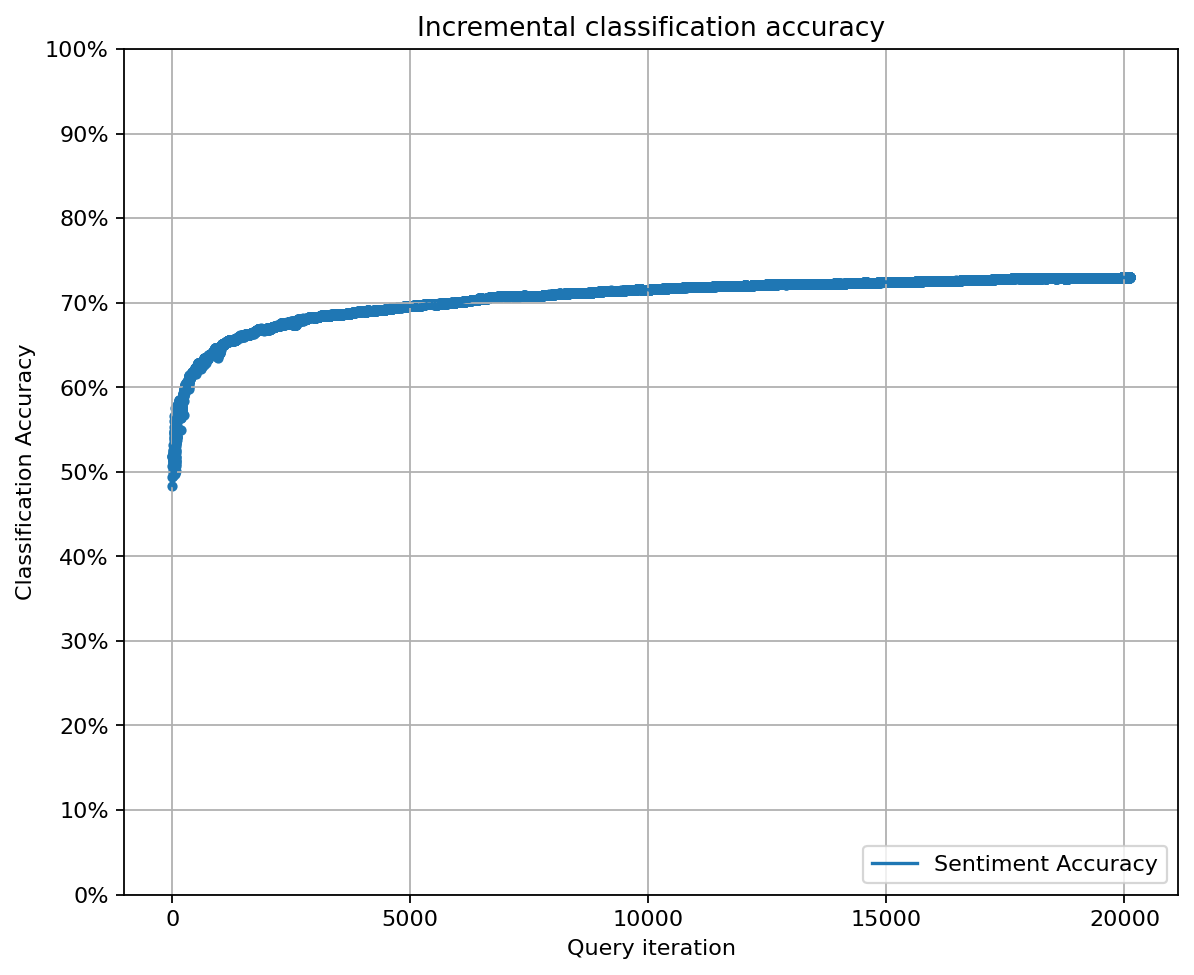

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 7), dpi=160)

ax.plot(performance_history, label="Sentiment Accuracy")
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.legend(loc="lower right")
plt.show()

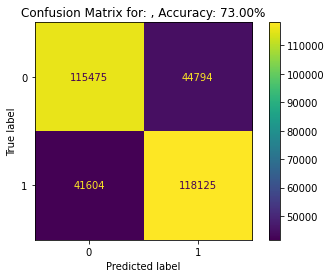

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


mat = confusion_matrix(y_true=y_test, y_pred=lastPred)
disp = ConfusionMatrixDisplay(confusion_matrix=mat).plot()
plt.title('Confusion Matrix for: ' + ", Accuracy: " + "{:.2%}".format(accuracy_score(y_true=y_test, y_pred=lastPred)))
plt.show()